In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
#1년단위 데이터는 데이터가 작아서 맞는지 틀린지 확인하기가 힘듬.
# 연단위 데이터 -> 분기, 월단위되는것만 모아서..

In [5]:
#1. 데이터 생성

In [6]:
#macro = pd.read_csv('data/america_index.csv')
#연단위 데이터

In [7]:
ex_im = pd.read_csv('data/ex-im.csv')

In [8]:
growth = pd.read_csv('data/growth.csv')

In [9]:
unemploy = pd.read_csv('data/unemployment.csv')

In [10]:
interset = pd.read_csv('data/US_interest.csv')

In [11]:
price = pd.read_csv('data/XOM_price.csv')

In [16]:
#1.1 데이터 확인및 전처리

In [13]:
unemploy = unemploy.iloc[:,4:].T

In [14]:
unemploy.columns = ['실업률']

월자료 

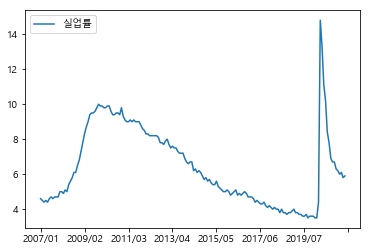

In [15]:
unemploy.plot.line()

In [263]:
growth

,통계표,항목명1,단위,변환,2007 2,2007 3,2007 4,2008 1,2008 2,2008 3,...,2019 3,2019 4,2020 1,2020 2,2020 3,2020 4,2021 1,2021 2,2021 3,2021 4
0,18.1.4.1 경제성장률,미국,%,원자료,0.6,0.5,0.6,-0.6,0.5,-0.5,...,0.6,0.6,-1.3,-9.0,7.5,1.1,1.6,NaN,NaN,NaN


In [264]:
growth.iloc[:,4:-3].T

,0
2007 2,0.6
2007 3,0.5
2007 4,0.6
2008 1,-0.6
2008 2,0.5
2008 3,-0.5
2008 4,-2.2
2009 1,-1.1
2009 2,-0.1
2009 3,0.4


In [265]:
growth = growth.iloc[:,4:-3].T

In [266]:
growth.shape

(56, 1)

In [267]:
growth.columns = ['성장률']

In [269]:
growth = growth.reset_index()

분기자료

In [270]:
ex_im

,통계표,항목명1,단위,변환,2007 1,2007 2,2007 3,2007 4,2008 1,2008 2,...,2019 3,2019 4,2020 1,2020 2,2020 3,2020 4,2021 1,2021 2,2021 3,2021 4
0,18.1.3.1 경상수지,미국,백만달러,원자료,"-183,935.00","-192,344.00","-191,125.00","-169,150.00","-160,406.00","-180,281.00",...,"-140,241.00","-101,785.00","-97,938.00","-162,596.00","-196,912.00","-189,772.00",NaN,NaN,NaN,NaN
1,18.1.3.1 경상수지,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
ex_im = ex_im.iloc[0,3:-4].T

In [272]:
ex_im = pd.DataFrame(ex_im)

In [273]:
ex_im.columns = ['경상수지']

In [274]:
ex_im = ex_im.reset_index()

In [277]:
ex_im=ex_im.iloc[1:,:]

In [280]:
growth.shape

(56, 2)

In [279]:
ex_im.shape

(56, 2)

In [284]:
unemploy = unemploy.reset_index()

In [291]:
unemploy['index'].str.slice(0,-3)

0      2007
1      2007
2      2007
3      2007
4      2007
       ... 
169    2021
170    2021
171    2021
172    2021
173    2021
Name: index, Length: 174, dtype: object

In [293]:
unemploy['Date'] = np.where(unemploy['index'].str.slice(-2,).astype('int64')<4,unemploy['index'].str.slice(0,-3)+' '+'1',
         np.where(unemploy['index'].str.slice(-2,).astype('int64')<7,unemploy['index'].str.slice(0,-3)+' '+'2',
                  np.where(unemploy['index'].str.slice(-2,).astype('int64')<10,unemploy['index'].str.slice(0,-3)+' '+'3',
                           unemploy['index'].str.slice(0,-3)+' '+'4')))

In [299]:
unemploy = unemploy.iloc[:,1:]

In [320]:
Q_data = pd.merge(ex_im,growth,on = 'index').rename(columns = {'index':'Date'})

In [326]:
Q_unemploy = unemploy.groupby('Date').mean().reset_index()

In [327]:
Q_data = pd.merge(Q_data,Q_unemploy,on = 'Date')

In [328]:
Q_data

,Date,경상수지,성장률,실업률
0,2007 2,"-192,344.00",0.6,4.500000
1,2007 3,"-191,125.00",0.5,4.666667
2,2007 4,"-169,150.00",0.6,4.800000
3,2008 1,"-160,406.00",-0.6,5.000000
4,2008 2,"-180,281.00",0.5,5.333333
5,2008 3,"-202,887.00",-0.5,6.000000
6,2008 4,"-152,952.00",-2.2,6.866667
7,2009 1,"-83,678.00",-1.1,8.266667
8,2009 2,"-87,632.00",-0.1,9.300000
9,2009 3,"-111,200.00",0.4,9.633333


In [329]:
H7_data=pd.merge(Q_data,month_price,on = 'Date')

In [344]:
interset

,Date,interest
0,2007 1,5.35000
1,2007 2,5.36000
2,2007 3,5.22875
3,2007 4,4.70250
4,2008 1,2.68813
5,2008 2,2.78313
6,2008 3,4.05250
7,2008 4,1.42500
8,2009 1,1.19188
9,2009 2,0.59500


In [345]:
H7_data=pd.merge(H7_data,interset,on = 'Date')

In [346]:
H7_data

,Date,경상수지,성장률,실업률,Close,Volume,interest
0,2007 2,"-192,344.00",0.6,4.500000,81.198076,2.228958e+07,5.36000
1,2007 3,"-191,125.00",0.5,4.666667,87.456942,2.667673e+07,5.22875
2,2007 4,"-169,150.00",0.6,4.800000,90.523087,2.257801e+07,4.70250
3,2008 1,"-160,406.00",-0.6,5.000000,86.483770,2.807824e+07,2.68813
4,2008 2,"-180,281.00",0.5,5.333333,89.713449,2.543915e+07,2.78313
5,2008 3,"-202,887.00",-0.5,6.000000,79.710303,3.123942e+07,4.05250
6,2008 4,"-152,952.00",-2.2,6.866667,74.919431,5.281627e+07,1.42500
7,2009 1,"-83,678.00",-1.1,8.266667,73.282810,4.174828e+07,1.19188
8,2009 2,"-87,632.00",-0.1,9.300000,69.526756,2.793164e+07,0.59500
9,2009 3,"-111,200.00",0.4,9.633333,69.293651,2.209040e+07,0.28688


In [305]:
price['month'] = price['Date'].str.slice(0,7)

In [307]:
year_price= price.groupby('month').mean()[['Close','Volume']].reset_index()

In [309]:
year_price['Date'] = np.where(year_price['month'].str.slice(-2,).astype('int64')<4,year_price['month'].str.slice(0,-3)+' '+'1',
         np.where(year_price['month'].str.slice(-2,).astype('int64')<7,year_price['month'].str.slice(0,-3)+' '+'2',
                  np.where(year_price['month'].str.slice(-2,).astype('int64')<10,year_price['month'].str.slice(0,-3)+' '+'3',
                           year_price['month'].str.slice(0,-3)+' '+'4')))

In [311]:
month_price = year_price.groupby('Date').mean()[['Close','Volume']].reset_index()

In [12]:
price['year']= price['Date'].str.slice(0,4)

In [34]:
year_price= price.groupby('year').mean()[['Close','Volume']].reset_index()

In [343]:
interset = interset.iloc[:,1:]

In [17]:
interset['year']= interset['Date'].str.slice(0,4)

In [20]:
year_interset= interset.groupby('year').mean()[['interest']]

In [33]:
year_interset = year_interset.reset_index()

In [25]:
year_macro= macro[['year','GDP(10Bi$)','GDP_growth','Unemployment','party','EX-IM']]

In [41]:
year_price['year']= year_price['year'].astype('int64')

In [42]:
year_interset['year']= year_interset['year'].astype('int64')

In [37]:
year_interset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      15 non-null     object 
 1   interest  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


In [36]:
year_macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13 non-null     int64  
 1   GDP(10Bi$)    13 non-null     float64
 2   GDP_growth    13 non-null     float64
 3   Unemployment  13 non-null     float64
 4   party         13 non-null     int64  
 5   EX-IM         13 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 752.0 bytes


In [137]:
H7_data= pd.merge(pd.merge(year_macro, year_interset,on='year'),year_price, on = 'year')

In [17]:
#1.2 데이터 저장

In [356]:
H7_data.to_csv('data/H7_data2.csv')

In [18]:
#2 데이터 확인

In [330]:
H7_data

,Date,경상수지,성장률,실업률,Close,Volume
0,2007 2,"-192,344.00",0.6,4.500000,81.198076,2.228958e+07
1,2007 3,"-191,125.00",0.5,4.666667,87.456942,2.667673e+07
2,2007 4,"-169,150.00",0.6,4.800000,90.523087,2.257801e+07
3,2008 1,"-160,406.00",-0.6,5.000000,86.483770,2.807824e+07
4,2008 2,"-180,281.00",0.5,5.333333,89.713449,2.543915e+07
5,2008 3,"-202,887.00",-0.5,6.000000,79.710303,3.123942e+07
6,2008 4,"-152,952.00",-2.2,6.866667,74.919431,5.281627e+07
7,2009 1,"-83,678.00",-1.1,8.266667,73.282810,4.174828e+07
8,2009 2,"-87,632.00",-0.1,9.300000,69.526756,2.793164e+07
9,2009 3,"-111,200.00",0.4,9.633333,69.293651,2.209040e+07


In [317]:
H7_data.head()

,Date,경상수지,성장률,실업률,Close,Volume
0,2007 2,"-192,344.00",0.6,4.5,81.198076,2.228958e+07
1,2007 2,"-192,344.00",0.6,4.4,81.198076,2.228958e+07
2,2007 2,"-192,344.00",0.6,4.6,81.198076,2.228958e+07
3,2007 3,"-191,125.00",0.5,4.7,87.456942,2.667673e+07
4,2007 3,"-191,125.00",0.5,4.6,87.456942,2.667673e+07


In [51]:
H7_data.describe()

,year,GDP(10Bi$),GDP_growth,Unemployment,party,EX-IM,interest,Close,Volume
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01
mean,2014.00000,17658.185899,1.280769,6.569385,0.384615,-448536.000000,0.978404,78.597565,1.864924e+07
std,3.89444,2444.794558,2.082308,2.107439,0.506370,107415.779136,0.908524,13.191314,8.254013e+06
min,2008.00000,14448.933025,-3.500000,3.669200,0.000000,-696526.000000,0.238000,44.524941,1.095114e+07
25%,2011.00000,15542.581104,1.550000,4.869200,0.000000,-455297.000000,0.372925,73.734643,1.240840e+07
50%,2014.00000,17521.746534,2.220000,6.167500,0.000000,-418112.000000,0.554002,81.861594,1.408922e+07
75%,2017.00000,19485.393853,2.450000,8.100000,1.000000,-379736.000000,1.369245,86.219682,2.643225e+07
max,2020.00000,21427.700000,3.180000,9.633400,1.000000,-336853.000000,2.737190,97.270119,3.448605e+07


In [349]:
H7_data.columns

Index(['Date', '경상수지', '성장률', '실업률', 'Close', 'Volume', 'interest'], dtype='object')

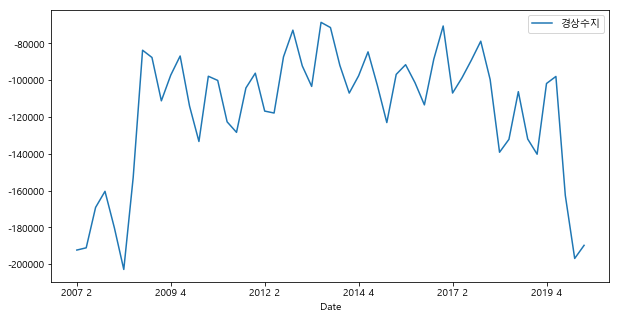

In [362]:
H7_data[['Date','경상수지']].plot.line(x='Date',figsize = (10,5))

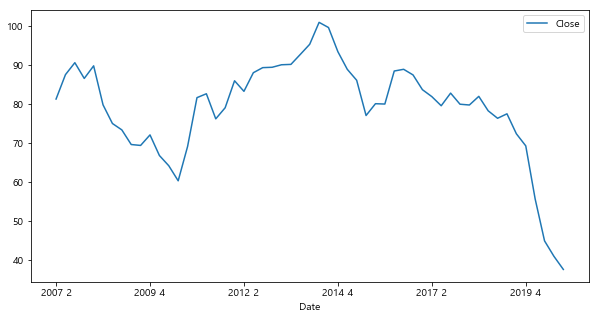

In [361]:
H7_data[['Date','Close']].plot.line(x='Date',figsize = (10,5))

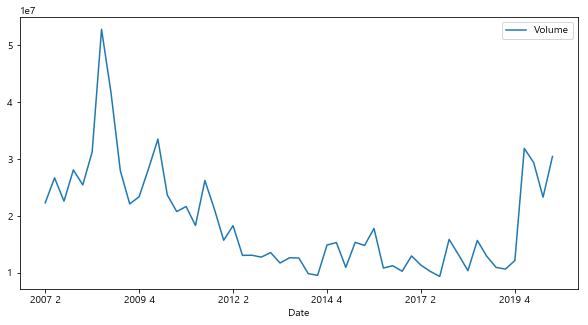

In [348]:
H7_data[['Date','Volume']].plot.line(x='Date',figsize = (10,5))

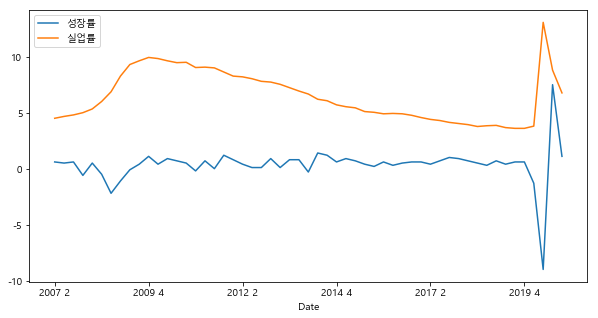

In [359]:
H7_data[['Date','성장률','실업률']].plot.line(x='Date',figsize = (10,5))

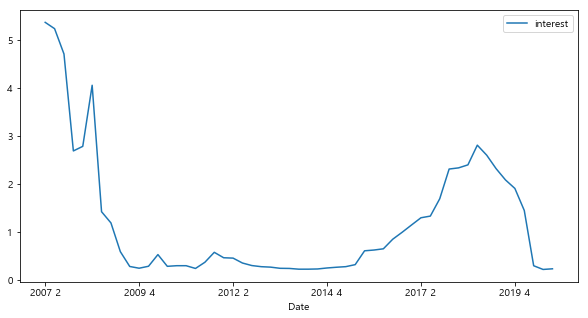

In [360]:
H7_data[['Date','interest']].plot.line(x='Date',figsize = (10,5))

In [355]:
H7_data['경상수지']=H7_data['경상수지'].str.replace(',','').astype('float')

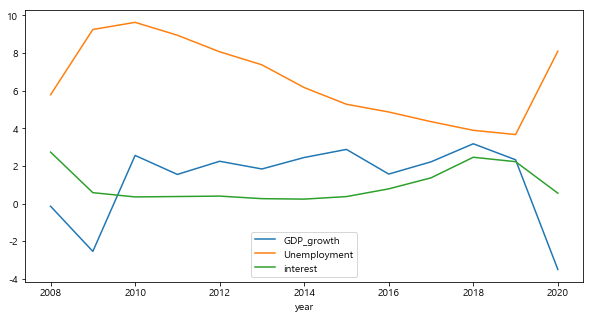

In [67]:
H7_data[['year','GDP_growth','Unemployment','interest']].plot.line(x='year',figsize = (10,5))

In [ ]:
H7_data[['year','GDP(10Bi$)']].plot.line(x='year',figsize = (10,5))

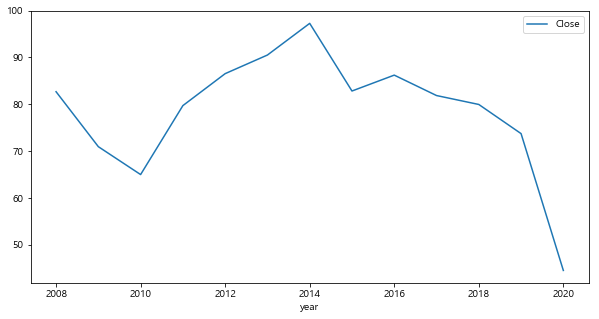

In [66]:
H7_data[['year','Close']].plot.line(x='year',figsize = (10,5))

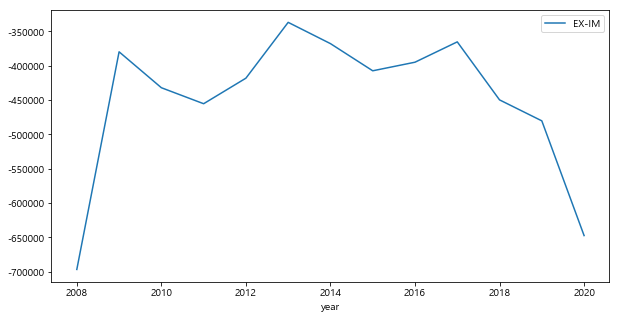

In [64]:
H7_data[['year','EX-IM']].plot.line(x='year',figsize = (10,5))

In [363]:
corr= list(H7_data.columns.values)

In [368]:
corr.remove('Date')

In [ ]:
#3 상관관계 분석

EOM의 Close와 경상수지 의 상관관계
(0.361155137203957, 0.006749153871981755)
EOM의 Close와 성장률 의 상관관계
(0.09154603373184583, 0.5062248519090745)
EOM의 Close와 실업률 의 상관관계
(-0.351640156225872, 0.008473571219440288)
EOM의 Close와 Volume 의 상관관계
(-0.5028183584719621, 9.143763036502354e-05)
EOM의 Close와 interest 의 상관관계
(0.11161429648467254, 0.4172044950562612)


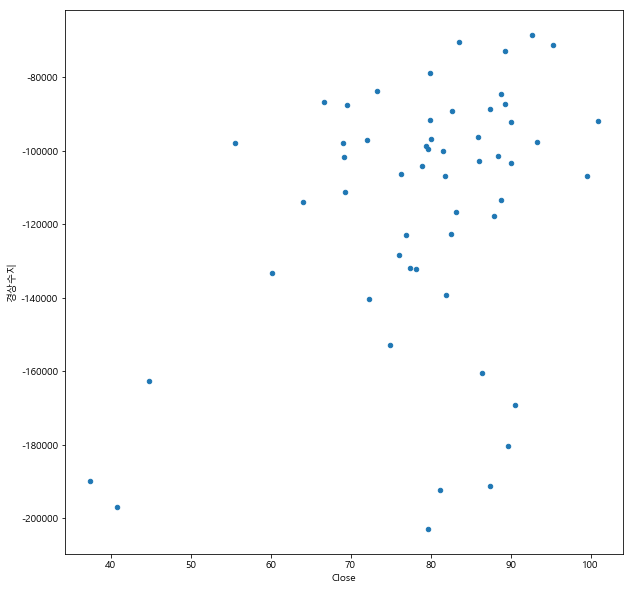

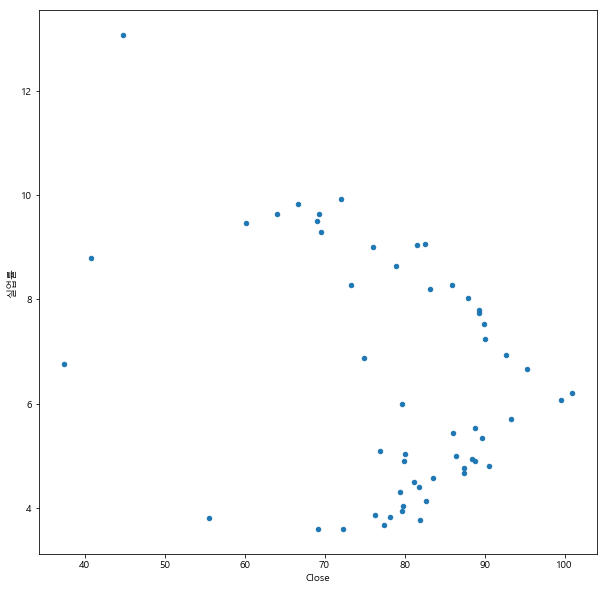

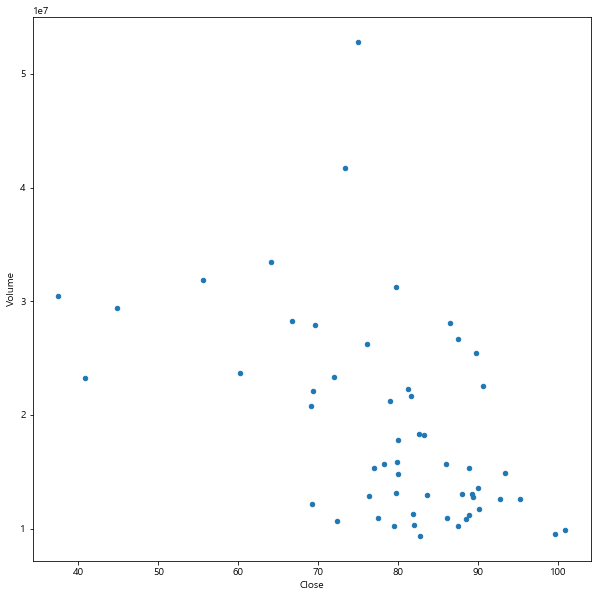

In [371]:
for i in corr:
    if i == 'Close':
        pass
    else :
        coff_result = stats.pearsonr(H7_data['Close'],H7_data[i])
        print('EOM의 Close와',i,'의 상관관계')
        print(coff_result)
        if coff_result[1]<0.05:
            H7_data[['Close',i]].plot.scatter(x = 'Close', y = i,colormap='viridis',figsize = (10,10))

In [19]:
#4 데이터 스케일링(정규화)

In [139]:
column= list(H7_data.columns)

In [140]:
column.remove('year')
column.remove('party')

In [141]:
column= column[:]

In [142]:
column

['GDP(10Bi$)',
 'GDP_growth',
 'Unemployment',
 'EX-IM',
 'interest',
 'Close',
 'Volume']

In [128]:
H7_data[i].values.reshape(-1,1)

array([[44.52494082],
       [73.73464266],
       [79.95569696],
       [81.86159373],
       [86.21968245],
       [82.82845252],
       [97.2701189 ],
       [90.50789679],
       [86.53423996],
       [79.71222236],
       [64.9928175 ],
       [70.94658743],
       [82.67944653]])

In [143]:
from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
scaler = StandardScaler()   
for i in column:
    H7_data['scaler_'+i] = scaler.fit_transform(H7_data[i].values.reshape(-1,1))


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
#5 데이터 확인

In [144]:
H7_data

,year,GDP(10Bi$),GDP_growth,Unemployment,party,EX-IM,interest,Close,Volume,scaler_GDP(10Bi$),scaler_GDP_growth,scaler_Unemployment,scaler_EX-IM,scaler_interest,scaler_Close,scaler_Volume
0,2020,20936.600000,-3.50,8.1000,1,-647218,0.554002,44.524941,2.881142e+07,1.395733,-2.389647,0.755948,-1.925181,-0.486207,-2.688429,1.281453
1,2019,21427.700000,2.33,3.6692,1,-480228,2.228285,73.734643,1.161961e+07,1.604812,0.524454,-1.432358,-0.307088,1.431901,-0.383699,-0.886438
2,2018,20580.223000,3.18,3.8956,1,-449700,2.463377,79.955697,1.363587e+07,1.244012,0.949322,-1.320543,-0.011279,1.701230,0.107161,-0.632187
3,2017,19485.393853,2.22,4.3552,1,-365261,1.369245,81.861594,1.095114e+07,0.777905,0.469471,-1.093553,0.806915,0.447759,0.257541,-0.970733
4,2016,18707.188235,1.57,4.8692,0,-394867,0.783575,86.219682,1.240840e+07,0.446596,0.144571,-0.839696,0.520040,-0.223202,0.601407,-0.786972
5,2015,18219.297584,2.88,5.2800,0,-407356,0.372925,82.828453,1.408922e+07,0.238885,0.799369,-0.636808,0.399024,-0.693655,0.333829,-0.575020
6,2014,17521.746534,2.45,6.1675,0,-367812,0.238000,97.270119,1.172700e+07,-0.058087,0.584435,-0.198485,0.782196,-0.848229,1.473319,-0.872896
7,2013,16784.849190,1.84,7.3749,0,-336853,0.262663,90.507897,1.263173e+07,-0.371809,0.279529,0.397832,1.082181,-0.819975,0.939760,-0.758809
8,2012,16197.007349,2.25,8.0694,0,-418112,0.398313,86.534240,1.500328e+07,-0.622074,0.484466,0.740835,0.294801,-0.664571,0.626227,-0.459756
9,2011,15542.581104,1.55,8.9492,0,-455297,0.376020,79.712222,2.194062e+07,-0.900686,0.134574,1.175356,-0.065512,-0.690110,0.087950,0.415044


In [145]:
H7_data.shape

(13, 16)

In [132]:
H7_data.year

0     2020
1     2019
2     2018
3     2017
4     2016
5     2015
6     2014
7     2013
8     2012
9     2011
10    2010
11    2009
12    2008
Name: year, dtype: int64

In [146]:
scale_H7 = H7_data.iloc[:,9:]

In [147]:
scale_H7['year']= H7_data.year

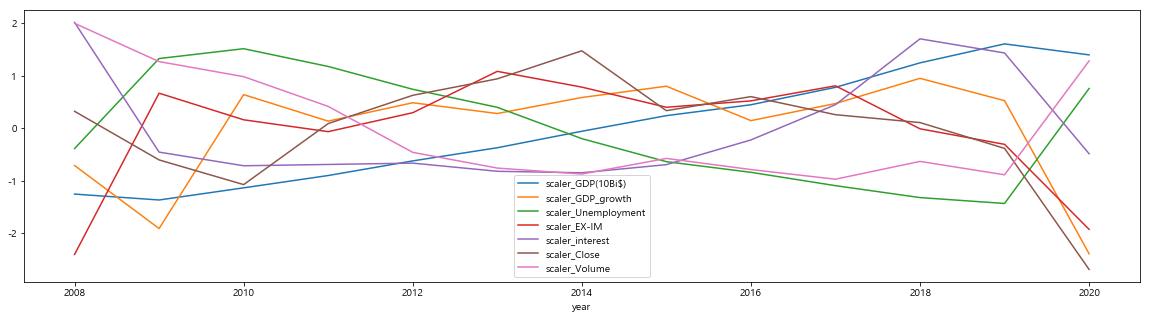

In [148]:
scale_H7.plot.line(x = 'year', figsize=(20,5))

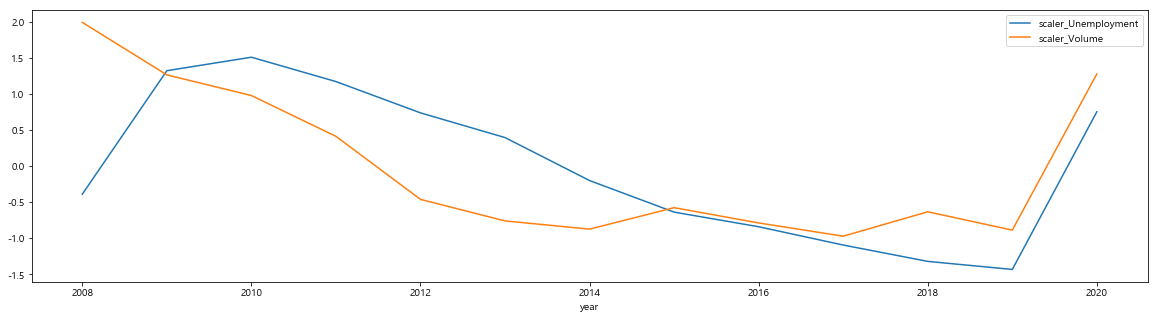

In [149]:
scale_H7[['year','scaler_Unemployment','scaler_Volume']].plot.line(x = 'year', figsize=(20,5))

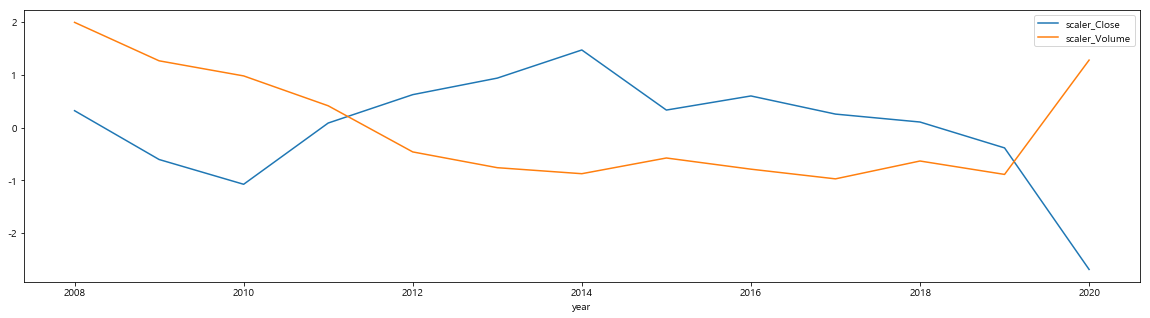

In [150]:
scale_H7[['year','scaler_Close','scaler_Volume']].plot.line(x = 'year', figsize=(20,5))

In [155]:
scale_H7.iloc[:,:-1].corr()

,scaler_GDP(10Bi$),scaler_GDP_growth,scaler_Unemployment,scaler_EX-IM,scaler_interest,scaler_Close,scaler_Volume
scaler_GDP(10Bi$),1.000000,0.117048,-0.689469,-0.068487,0.316482,-0.226961,-0.520752
scaler_GDP_growth,0.117048,1.000000,-0.440937,0.510087,0.076376,0.652029,-0.712120
scaler_Unemployment,-0.689469,-0.440937,1.000000,-0.007602,-0.650257,-0.348040,0.582484
scaler_EX-IM,-0.068487,0.510087,-0.007602,1.000000,-0.501207,0.534309,-0.697899
scaler_interest,0.316482,0.076376,-0.650257,-0.501207,1.000000,-0.008977,0.099931
scaler_Close,-0.226961,0.652029,-0.348040,0.534309,-0.008977,1.000000,-0.578020
scaler_Volume,-0.520752,-0.712120,0.582484,-0.697899,0.099931,-0.578020,1.000000


In [173]:
corr = scale_H7.iloc[:,:-1].columns.values

In [176]:
corr = corr[:-1]

In [166]:
corr = H7_data.iloc[:,1:].columns.values

In [375]:
H7_corr = H7_data.iloc[:,1:].corr()

In [ ]:
#

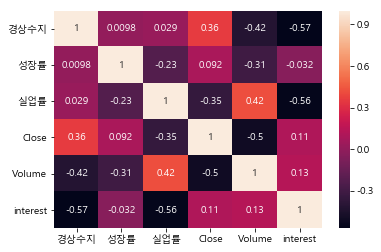

In [379]:
sns.heatmap(H7_corr,annot =True)

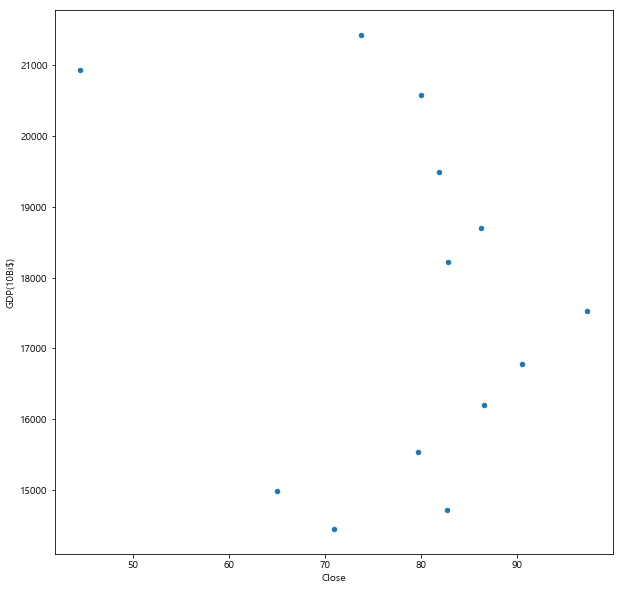

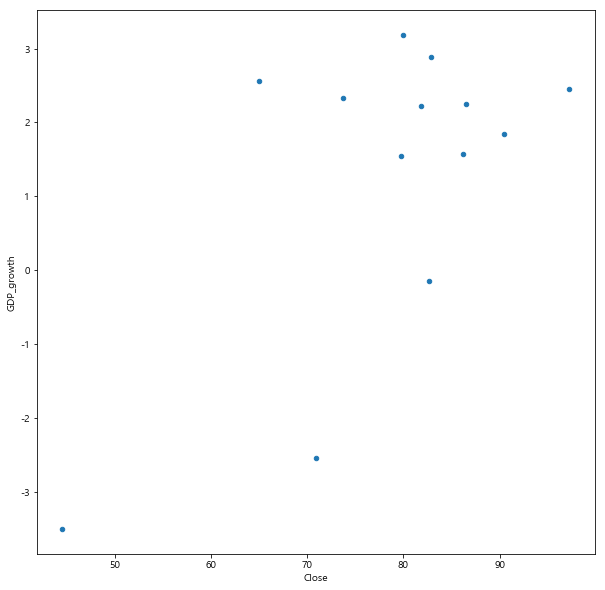

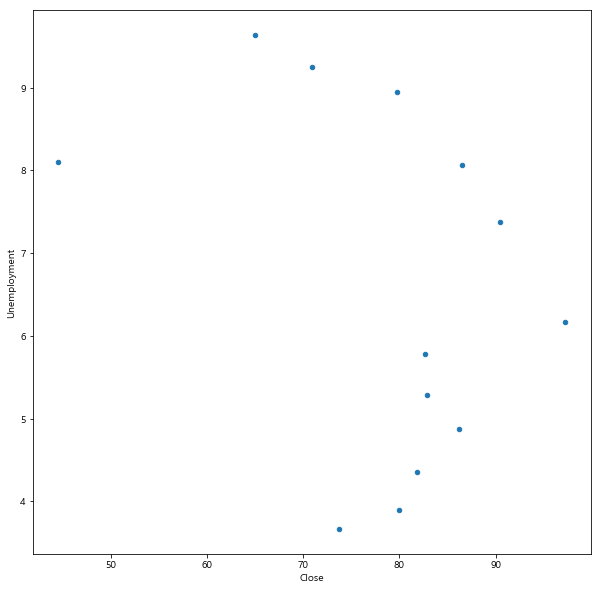

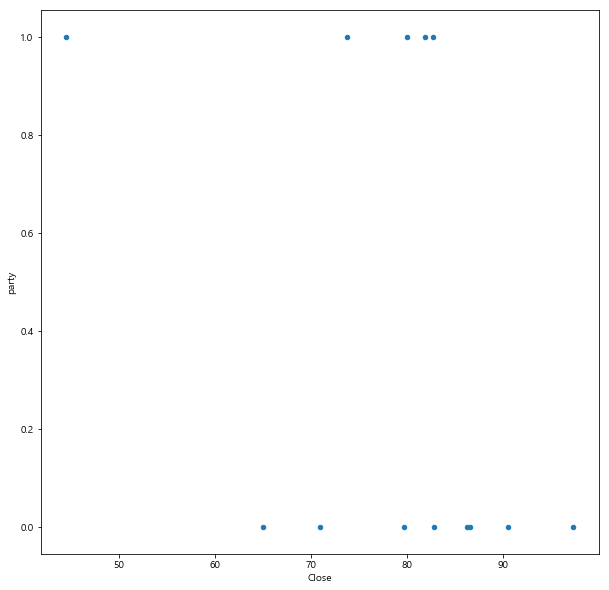

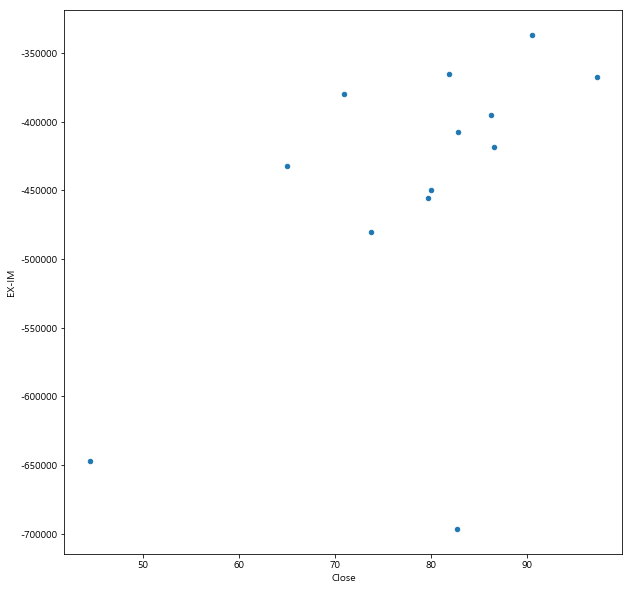

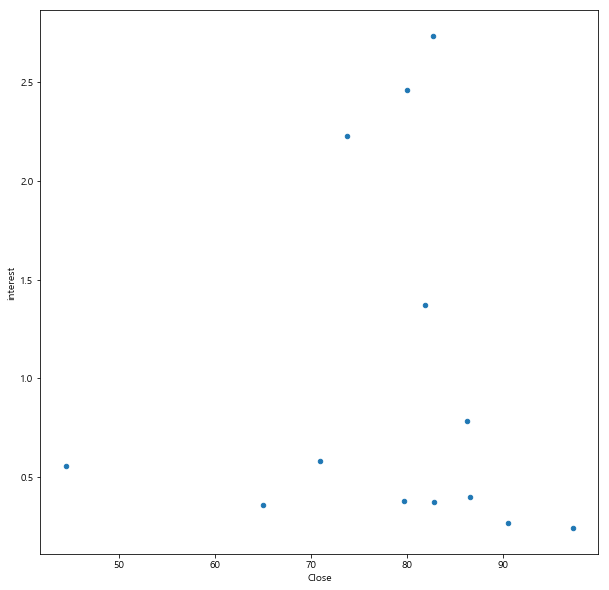

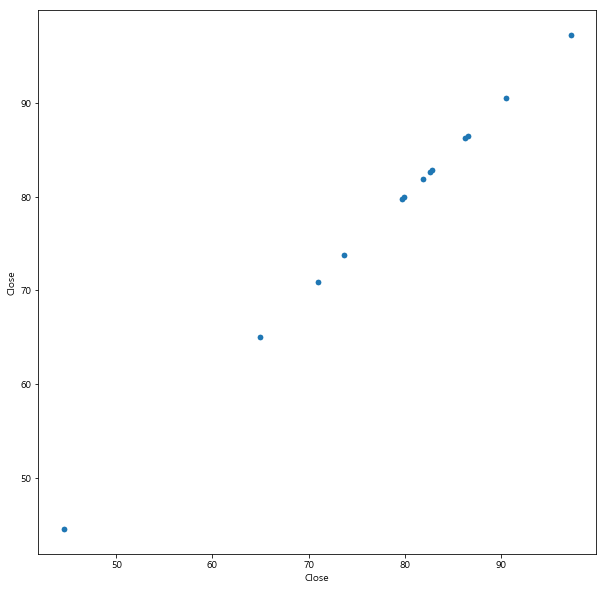

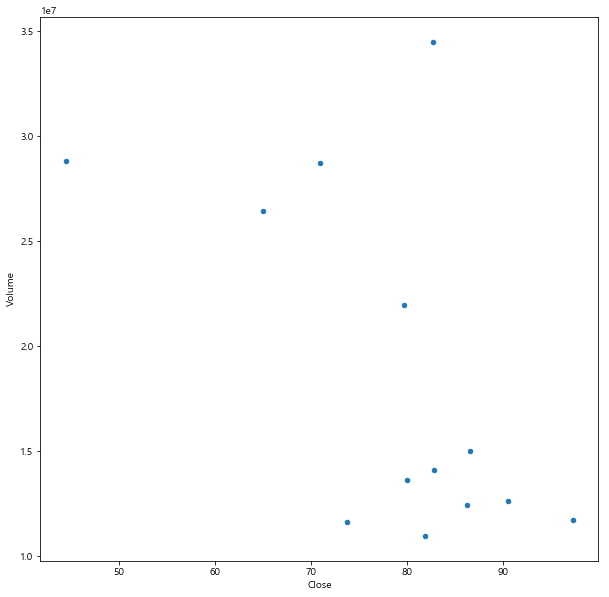

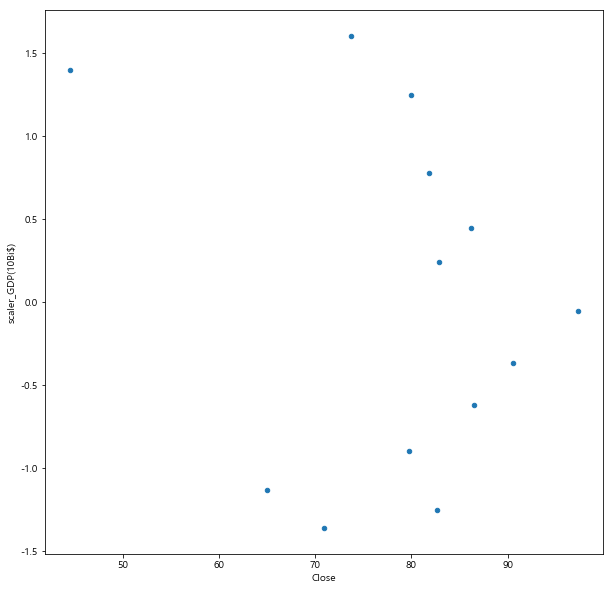

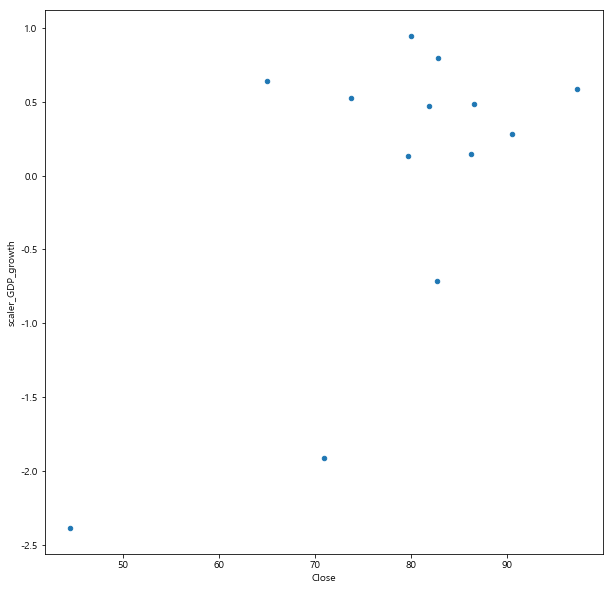

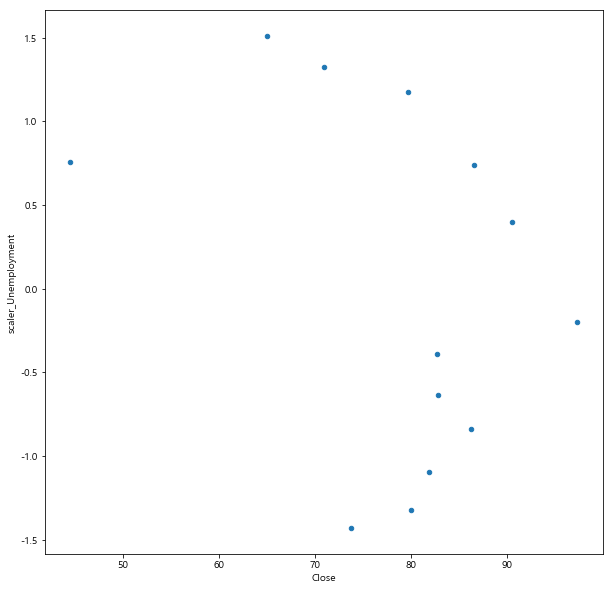

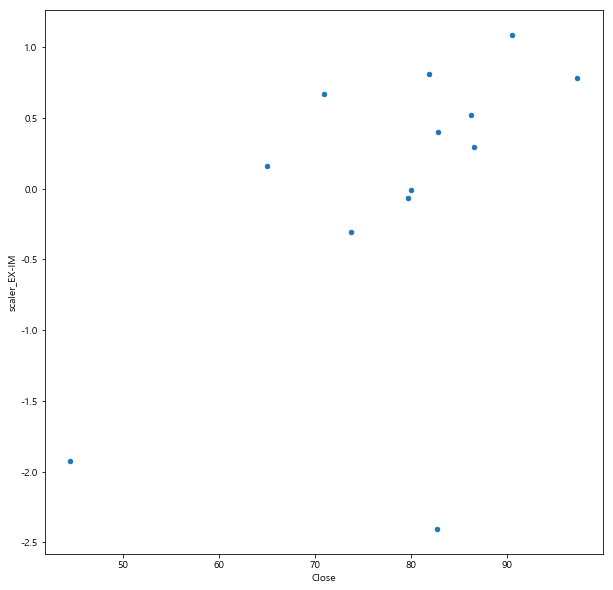

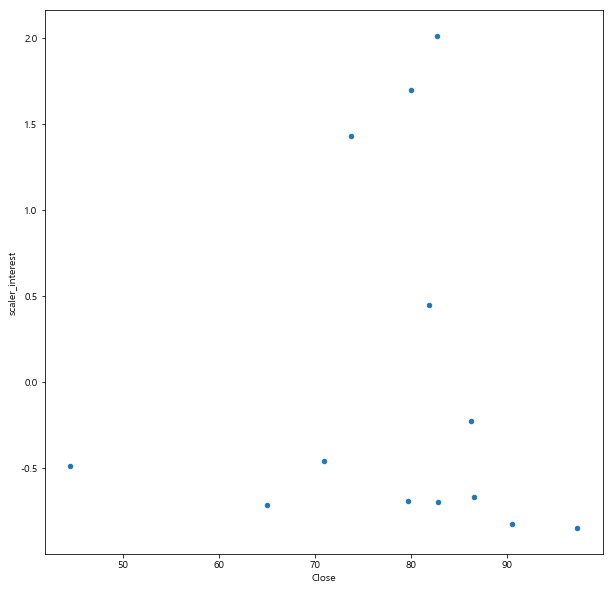

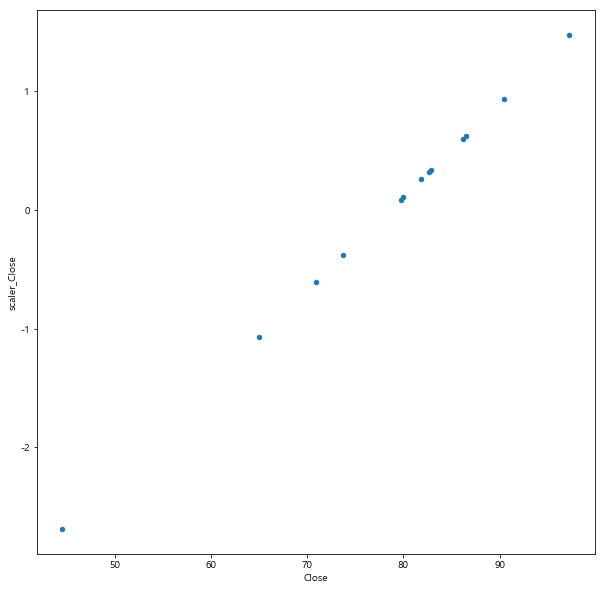

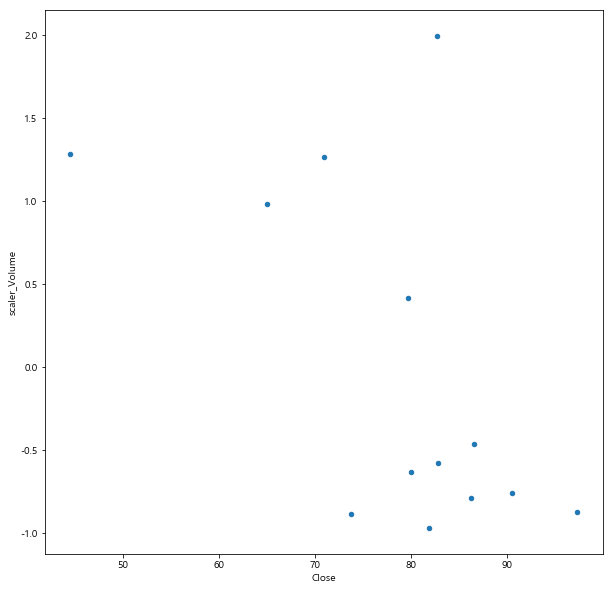

In [168]:
for i in corr:
    H7_data[['Close',i]].plot.scatter(x = 'Close', y = i,colormap='viridis',figsize = (10,10))

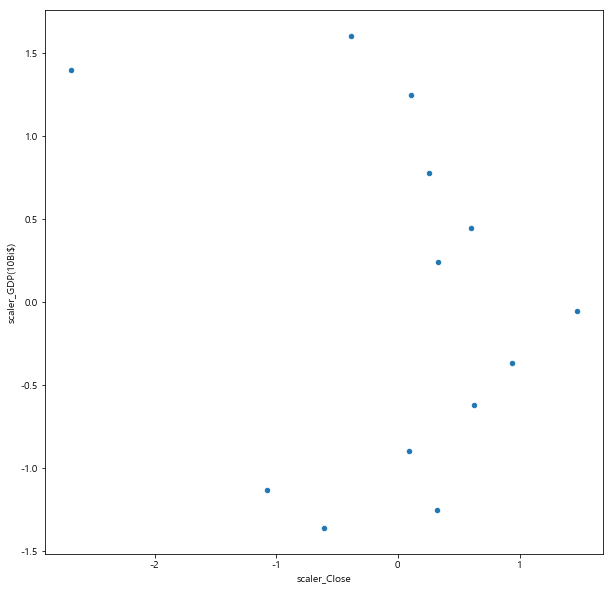

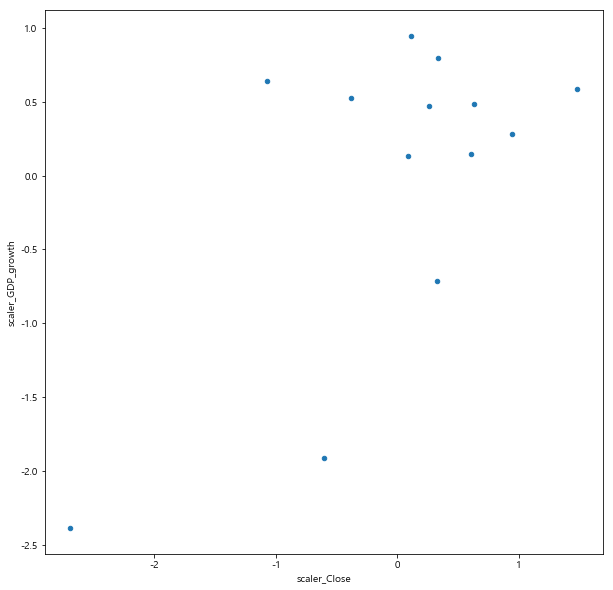

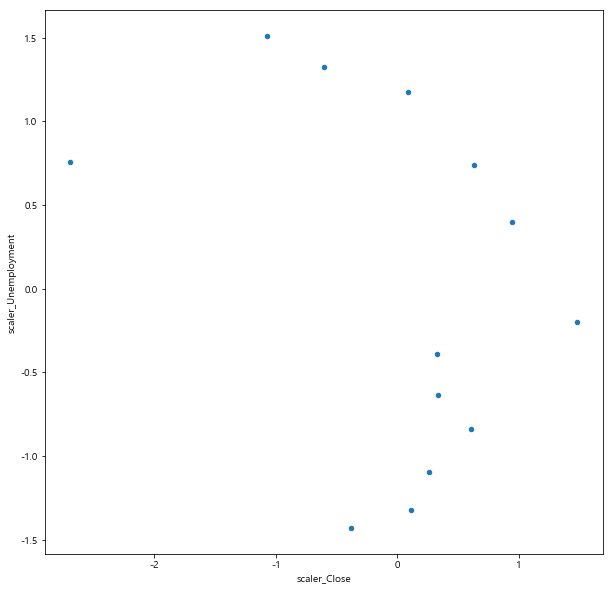

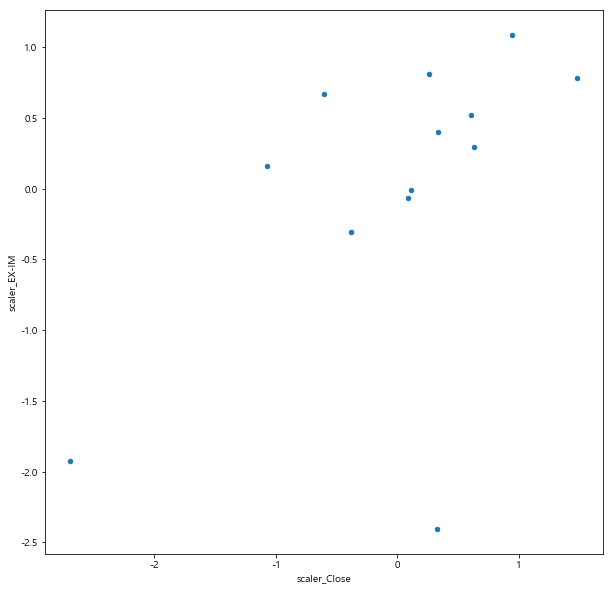

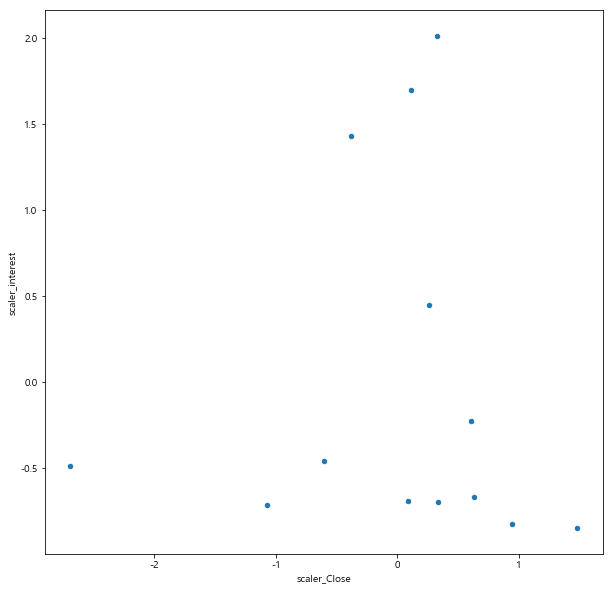

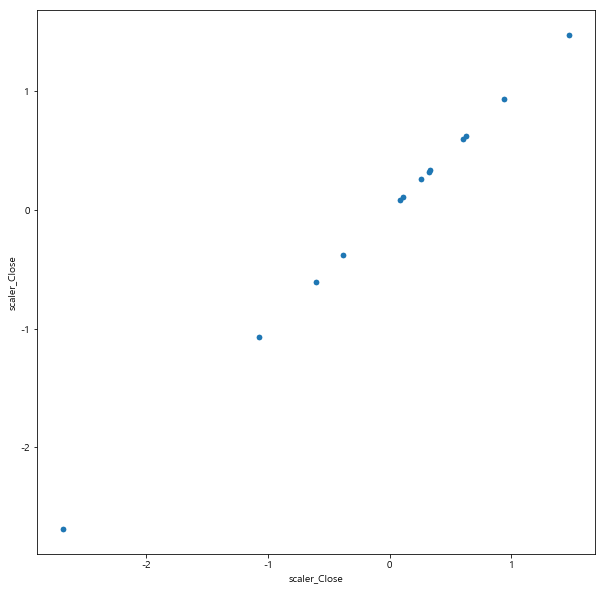

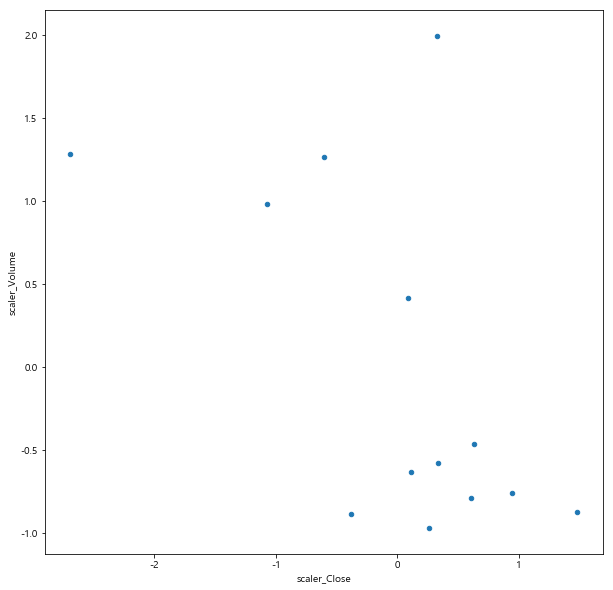

In [164]:
for i in corr:
    scale_H7[['scaler_Close',i]].plot.scatter(x = 'scaler_Close', y = i,colormap='viridis',figsize = (10,10))

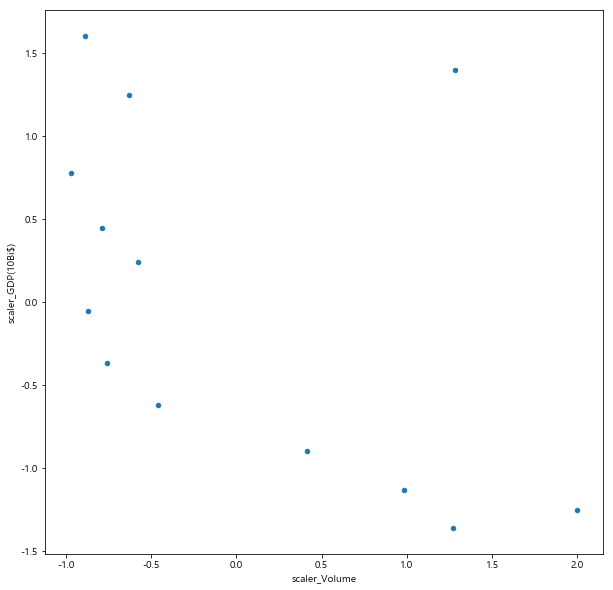

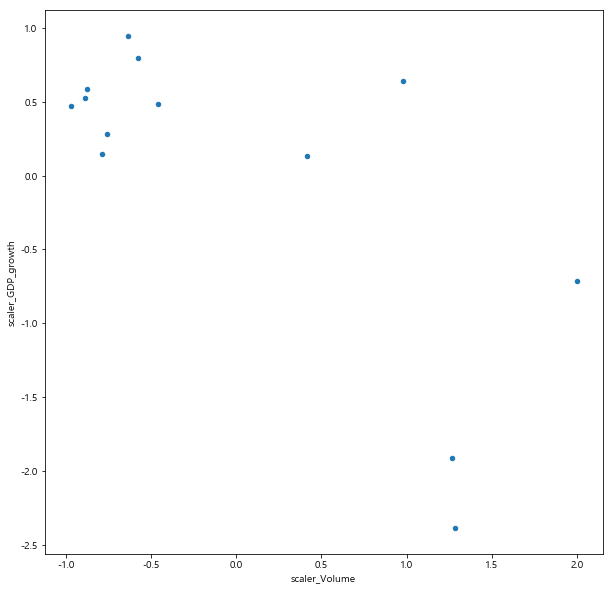

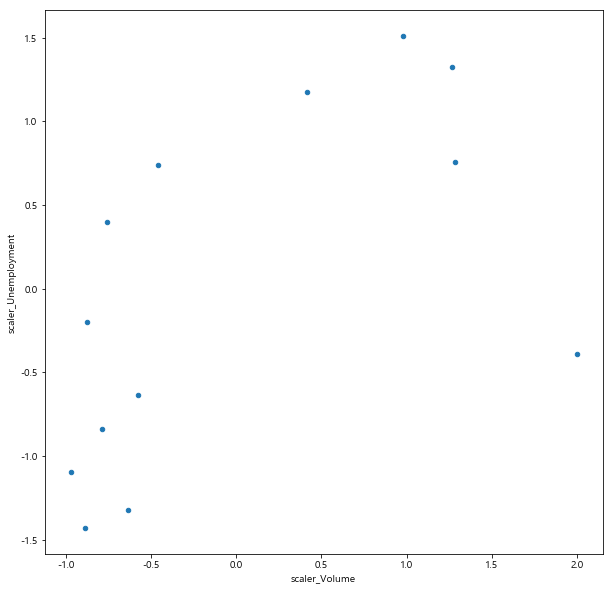

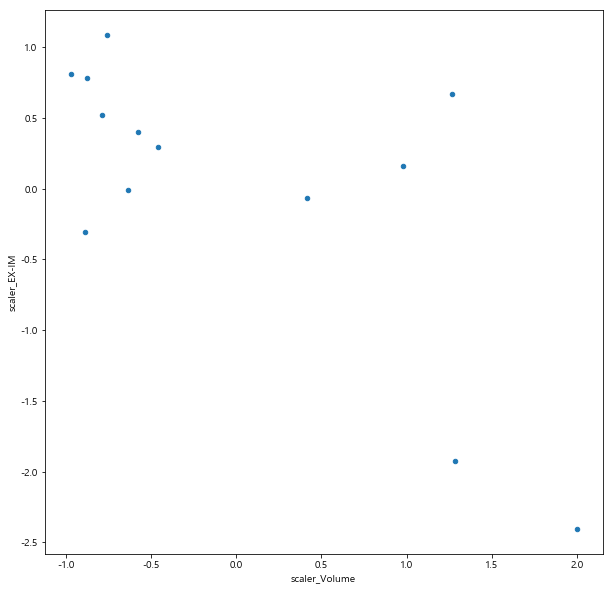

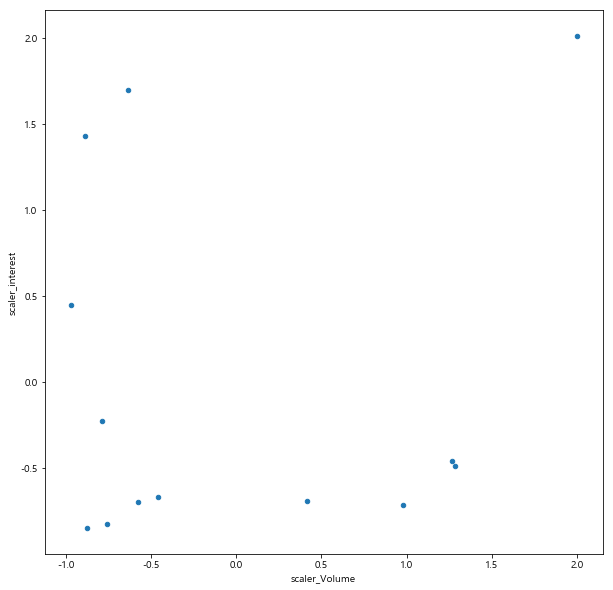

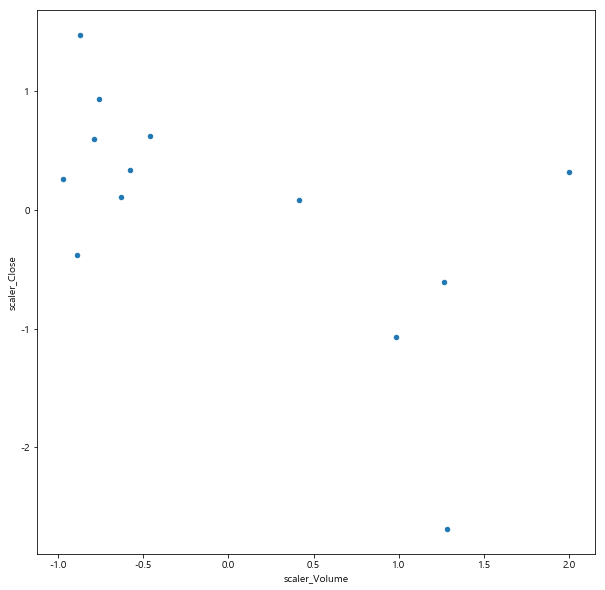

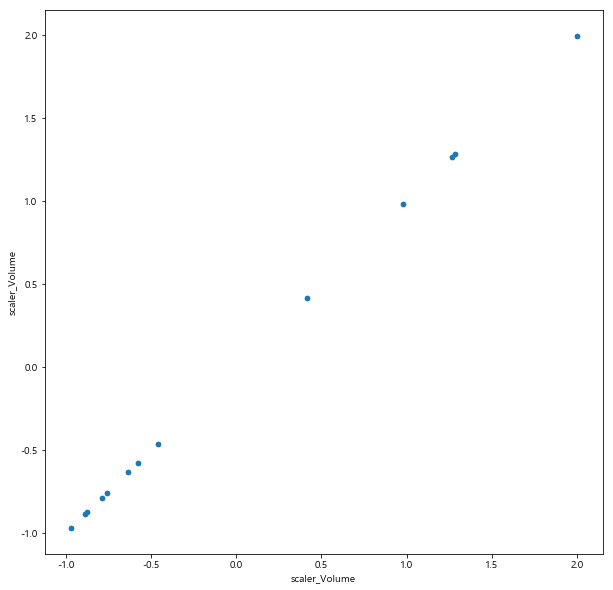

In [165]:
for i in corr:
    scale_H7[['scaler_Volume',i]].plot.scatter(x = 'scaler_Volume', y = i,colormap='viridis',figsize = (10,10))

EOM의 종가와 scaler_GDP(10Bi$) 의 상관관계
(-0.22696050063636408, 0.4558615573204356)
EOM의 종가와 scaler_GDP_growth 의 상관관계
(0.6520288803136683, 0.015734165776082207)
EOM의 종가와 scaler_Unemployment 의 상관관계
(-0.3480396002656311, 0.2438876063527189)
EOM의 종가와 scaler_EX-IM 의 상관관계
(0.5343090045239367, 0.05996820347071896)
EOM의 종가와 scaler_interest 의 상관관계
(-0.008977294145081893, 0.9767794504109826)
EOM의 종가와 scaler_Close 의 상관관계
(1.0, 0.0)
EOM의 종가와 scaler_Volume 의 상관관계
(-0.5780195695416592, 0.038535571585931426)


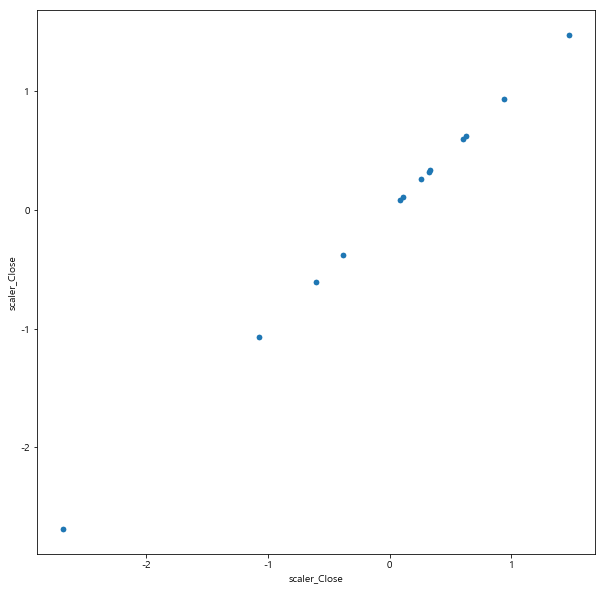

In [162]:
for i in corr:
    coff_result = stats.pearsonr(scale_H7['scaler_Close'],scale_H7[i])
    print('EOM의 종가와',i,'의 상관관계')
    print(coff_result)
    if coff_result[1]<0.0001:
        scale_H7[['scaler_Close',i]].plot.scatter(x = 'scaler_Close', y = i,colormap='viridis',figsize = (10,10))

EOM의 Volume와 scaler_GDP(10Bi$) 의 상관관계
(-0.5207517335116413, 0.06805281510858917)
EOM의 Volume와 scaler_GDP_growth 의 상관관계
(-0.7121202042227115, 0.006317168001247781)
EOM의 Volume와 scaler_Unemployment 의 상관관계
(0.582483714425624, 0.03671482725974753)
EOM의 Volume와 scaler_EX-IM 의 상관관계
(-0.6978988212272975, 0.007988317804707969)
EOM의 Volume와 scaler_interest 의 상관관계
(0.09993057409652077, 0.745321569590764)
EOM의 Volume와 scaler_Close 의 상관관계
(-0.5780195695416592, 0.038535571585931426)
EOM의 Volume와 scaler_Volume 의 상관관계
(1.0, 0.0)


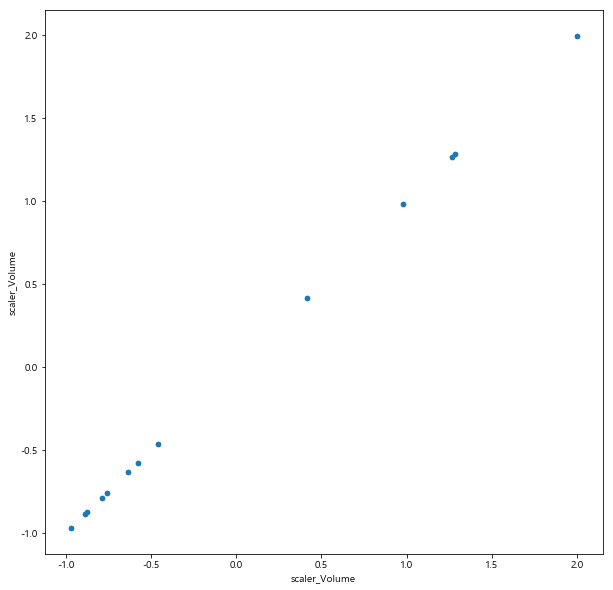

In [163]:
for i in corr:
    coff_result = stats.pearsonr(scale_H7['scaler_Volume'],scale_H7[i])
    print('EOM의 Volume와',i,'의 상관관계')
    print(coff_result)
    if coff_result[1]<0.0001:
        scale_H7[['scaler_Volume',i]].plot.scatter(x = 'scaler_Volume', y = i,colormap='viridis',figsize = (10,10))

In [170]:
H7_data

,year,GDP(10Bi$),GDP_growth,Unemployment,party,EX-IM,interest,Close,Volume,scaler_GDP(10Bi$),scaler_GDP_growth,scaler_Unemployment,scaler_EX-IM,scaler_interest,scaler_Close,scaler_Volume
0,2020,20936.600000,-3.50,8.1000,1,-647218,0.554002,44.524941,2.881142e+07,1.395733,-2.389647,0.755948,-1.925181,-0.486207,-2.688429,1.281453
1,2019,21427.700000,2.33,3.6692,1,-480228,2.228285,73.734643,1.161961e+07,1.604812,0.524454,-1.432358,-0.307088,1.431901,-0.383699,-0.886438
2,2018,20580.223000,3.18,3.8956,1,-449700,2.463377,79.955697,1.363587e+07,1.244012,0.949322,-1.320543,-0.011279,1.701230,0.107161,-0.632187
3,2017,19485.393853,2.22,4.3552,1,-365261,1.369245,81.861594,1.095114e+07,0.777905,0.469471,-1.093553,0.806915,0.447759,0.257541,-0.970733
4,2016,18707.188235,1.57,4.8692,0,-394867,0.783575,86.219682,1.240840e+07,0.446596,0.144571,-0.839696,0.520040,-0.223202,0.601407,-0.786972
5,2015,18219.297584,2.88,5.2800,0,-407356,0.372925,82.828453,1.408922e+07,0.238885,0.799369,-0.636808,0.399024,-0.693655,0.333829,-0.575020
6,2014,17521.746534,2.45,6.1675,0,-367812,0.238000,97.270119,1.172700e+07,-0.058087,0.584435,-0.198485,0.782196,-0.848229,1.473319,-0.872896
7,2013,16784.849190,1.84,7.3749,0,-336853,0.262663,90.507897,1.263173e+07,-0.371809,0.279529,0.397832,1.082181,-0.819975,0.939760,-0.758809
8,2012,16197.007349,2.25,8.0694,0,-418112,0.398313,86.534240,1.500328e+07,-0.622074,0.484466,0.740835,0.294801,-0.664571,0.626227,-0.459756
9,2011,15542.581104,1.55,8.9492,0,-455297,0.376020,79.712222,2.194062e+07,-0.900686,0.134574,1.175356,-0.065512,-0.690110,0.087950,0.415044


In [171]:
scale_H7['party'] = H7_data['party']

In [180]:
scale_H7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   scaler_GDP(10Bi$)    13 non-null     float64
 1   scaler_GDP_growth    13 non-null     float64
 2   scaler_Unemployment  13 non-null     float64
 3   scaler_EX-IM         13 non-null     float64
 4   scaler_interest      13 non-null     float64
 5   scaler_Close         13 non-null     float64
 6   scaler_Volume        13 non-null     float64
 7   year                 13 non-null     int64  
 8   party                13 non-null     int64  
dtypes: float64(7), int64(2)
memory usage: 1.0 KB


In [181]:
scale_H7[['scaler_Volume',i,'party']]

,scaler_Volume,scaler_Volume,party
0,1.281453,1.281453,1
1,-0.886438,-0.886438,1
2,-0.632187,-0.632187,1
3,-0.970733,-0.970733,1
4,-0.786972,-0.786972,0
5,-0.575020,-0.575020,0
6,-0.872896,-0.872896,0
7,-0.758809,-0.758809,0
8,-0.459756,-0.459756,0
9,0.415044,0.415044,0


In [188]:
scale_H7['scaler_Volume']

0     1.281453
1    -0.886438
2    -0.632187
3    -0.970733
4    -0.786972
5    -0.575020
6    -0.872896
7    -0.758809
8    -0.459756
9     0.415044
10    0.981440
11    1.267847
12    1.997026
Name: scaler_Volume, dtype: float64

In [191]:
scale_H7[['scaler_Close',i,'party']]

,scaler_Close,scaler_Volume,party
0,-2.688429,1.281453,1
1,-0.383699,-0.886438,1
2,0.107161,-0.632187,1
3,0.257541,-0.970733,1
4,0.601407,-0.786972,0
5,0.333829,-0.575020,0
6,1.473319,-0.872896,0
7,0.939760,-0.758809,0
8,0.626227,-0.459756,0
9,0.087950,0.415044,0


In [ ]:
## 월간 데이터와의 상관관계

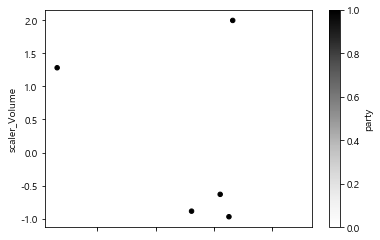

In [192]:
scale_H7[['scaler_Close',i,'party']].plot.scatter(x='scaler_Close',y = i,c = 'party')

EOM의 종가와 scaler_GDP(10Bi$) 의 상관관계
(-0.22696050063636408, 0.4558615573204356)
EOM의 종가와 scaler_GDP_growth 의 상관관계
(0.6520288803136683, 0.015734165776082207)
EOM의 종가와 scaler_Unemployment 의 상관관계
(-0.3480396002656311, 0.2438876063527189)
EOM의 종가와 scaler_EX-IM 의 상관관계
(0.5343090045239367, 0.05996820347071896)
EOM의 종가와 scaler_interest 의 상관관계
(-0.008977294145081893, 0.9767794504109826)
EOM의 종가와 scaler_Volume 의 상관관계
(-0.5780195695416592, 0.038535571585931426)


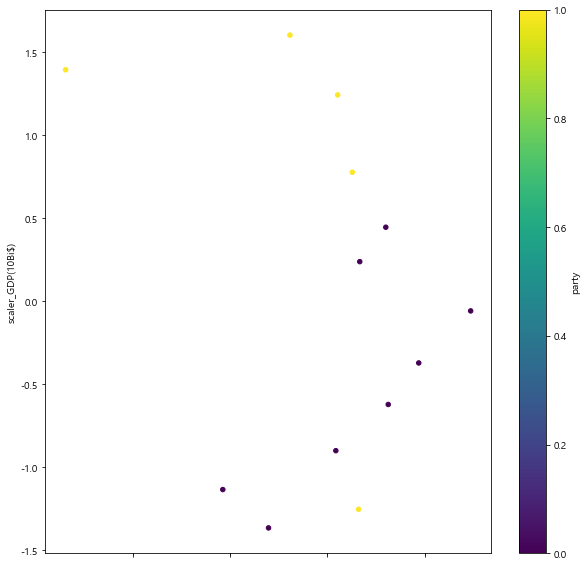

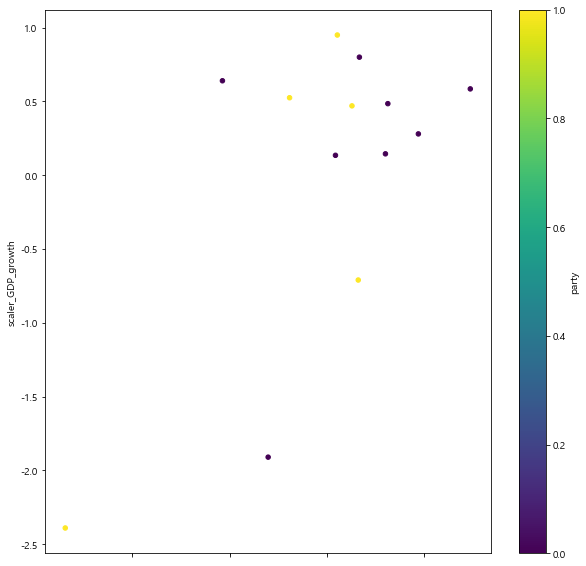

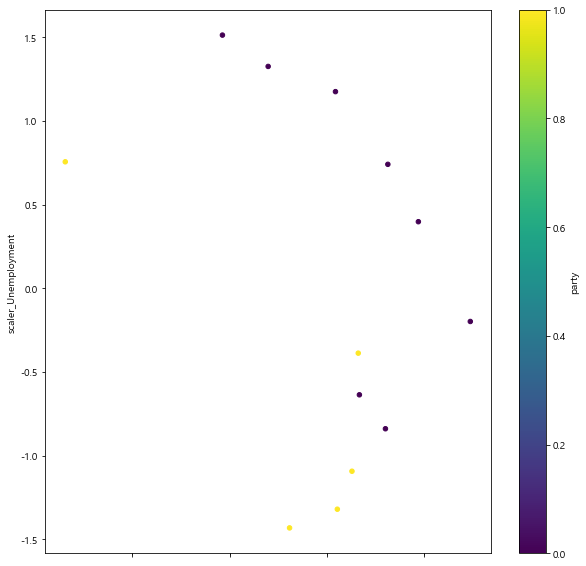

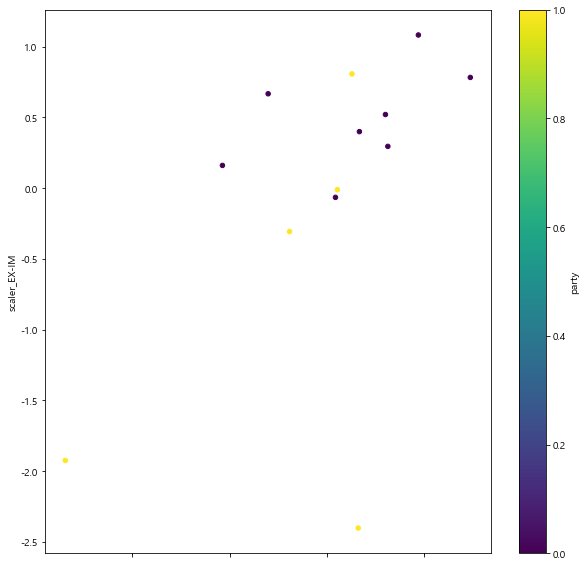

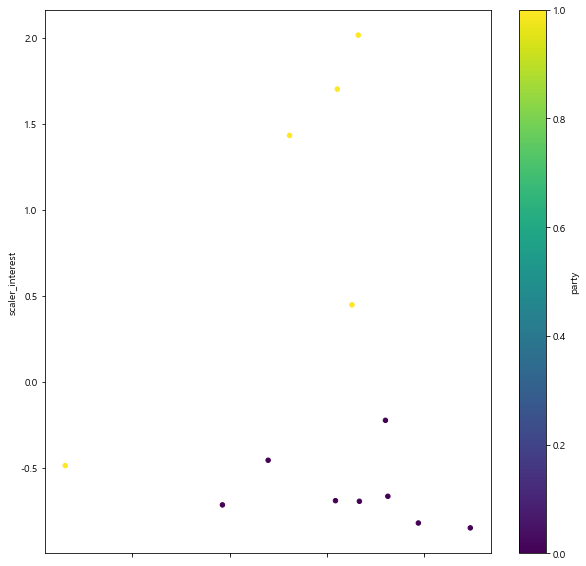

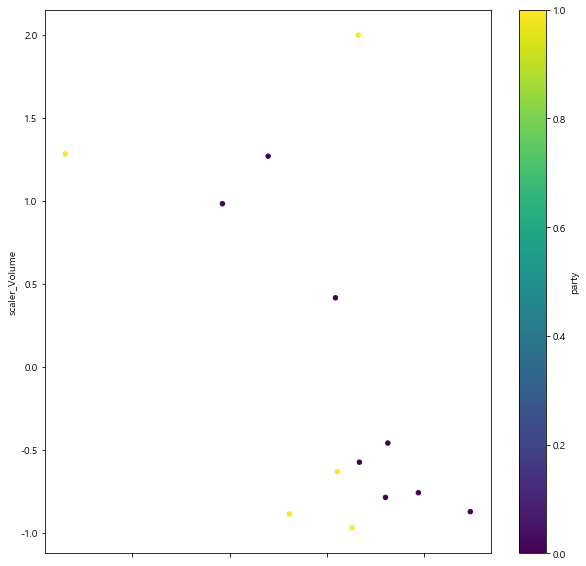

In [200]:
for i in corr:
    if i == 'scaler_Close':
        pass
    else :
        coff_result = stats.pearsonr(scale_H7['scaler_Close'],scale_H7[i])
        print('EOM의 종가와',i,'의 상관관계')
        print(coff_result)
#         if coff_result[1]<0.0001:
        scale_H7[['scaler_Close',i,'party']].plot.scatter(x = 'scaler_Close', y = i,c ='party',colormap='viridis',figsize = (10,10))

EOM의 Volume와 scaler_GDP(10Bi$) 의 상관관계
(-0.5207517335116413, 0.06805281510858917)
EOM의 Volume와 scaler_GDP_growth 의 상관관계
(-0.7121202042227115, 0.006317168001247781)
EOM의 Volume와 scaler_Unemployment 의 상관관계
(0.582483714425624, 0.03671482725974753)
EOM의 Volume와 scaler_EX-IM 의 상관관계
(-0.6978988212272975, 0.007988317804707969)
EOM의 Volume와 scaler_interest 의 상관관계
(0.09993057409652077, 0.745321569590764)
EOM의 Volume와 scaler_Close 의 상관관계
(-0.5780195695416592, 0.038535571585931426)


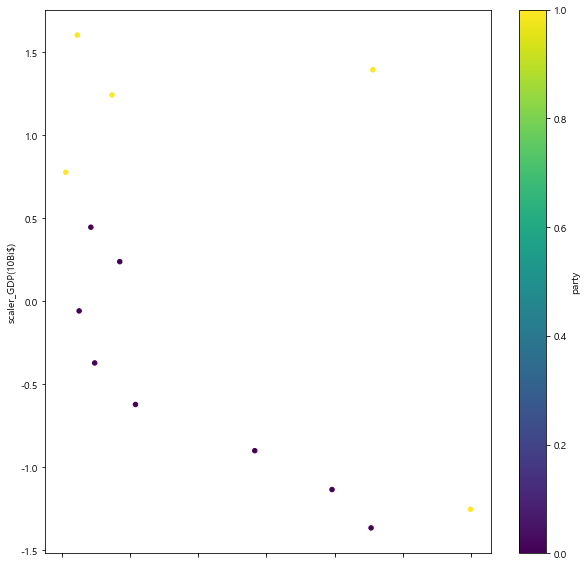

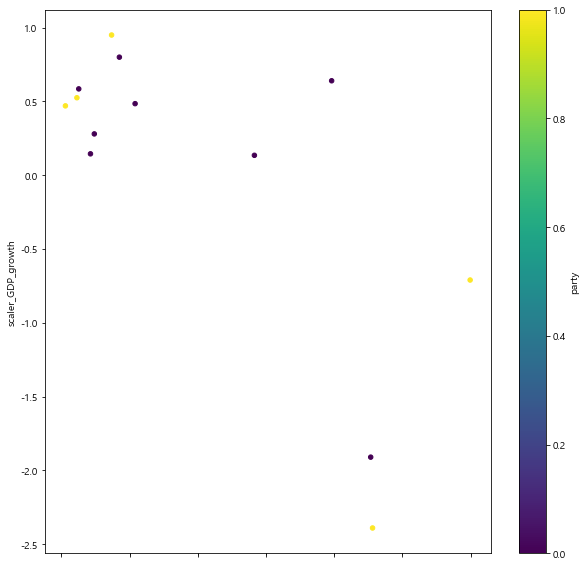

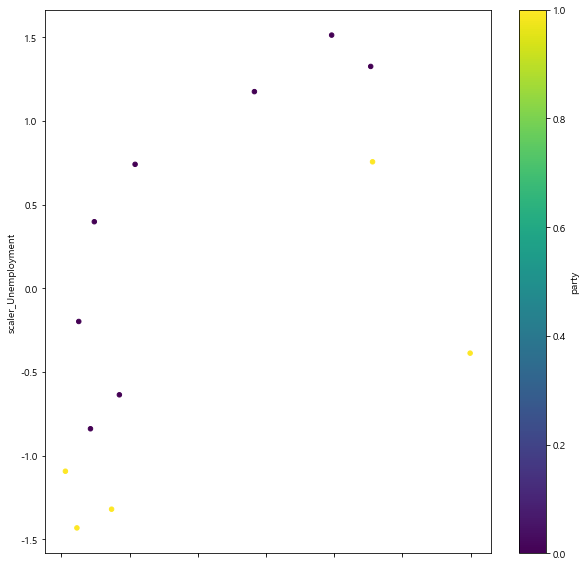

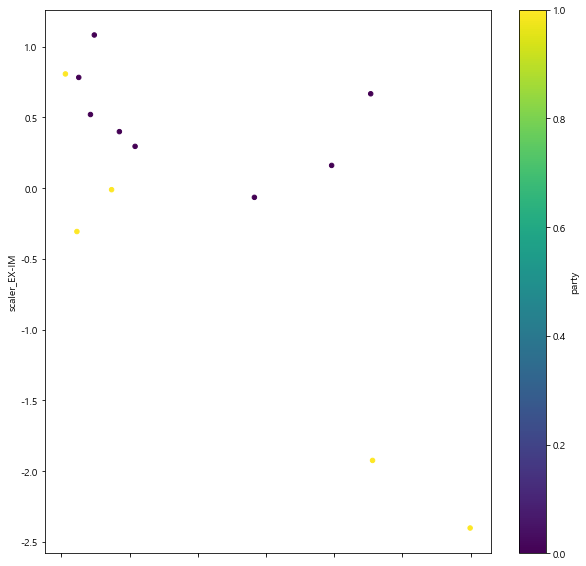

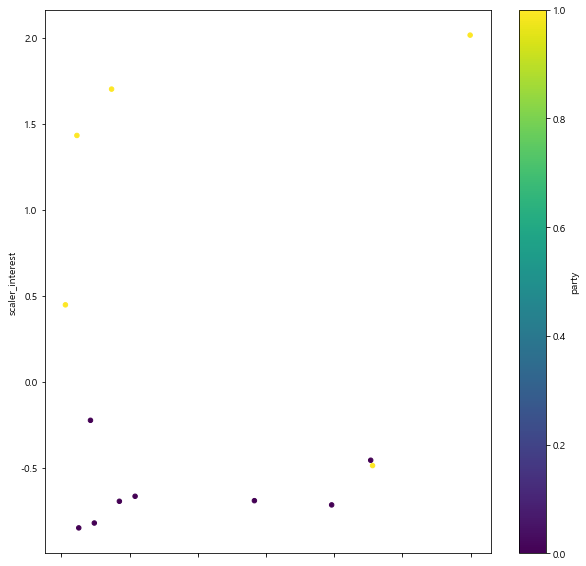

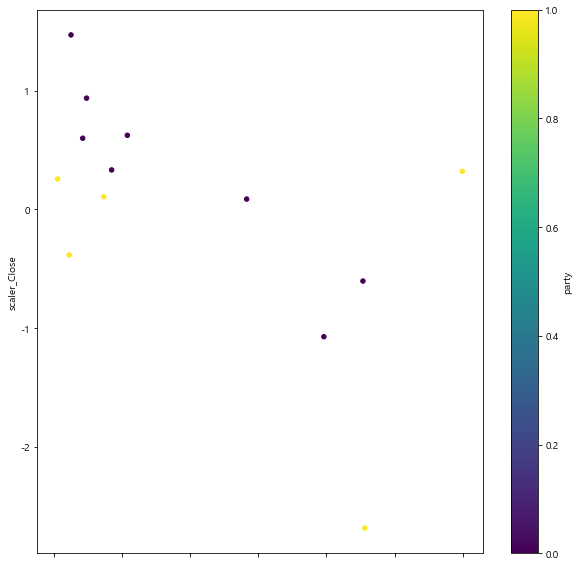

In [194]:
for i in corr:
    if i == 'scaler_Volume':
        pass
    else :
        coff_result = stats.pearsonr(scale_H7['scaler_Volume'],scale_H7[i])
        print('EOM의 Volume와',i,'의 상관관계')
        print(coff_result)
#         if coff_result[1]<0.0001:
        scale_H7[['scaler_Volume',i,'party']].plot.scatter(x = 'scaler_Volume', y = i,c ='party',colormap='viridis',figsize = (10,10))

In [ ]:
sns.heatmap()

EOM의 Volume와 scaler_GDP(10Bi$) 의 상관관계
(-0.6652702437430792, 0.22042837508022164)
EOM의 Volume와 scaler_GDP_growth 의 상관관계
(-0.7771434158837878, 0.12198132158360253)
EOM의 Volume와 scaler_Unemployment 의 상관관계
(0.7796750294666401, 0.1199578436140954)
EOM의 Volume와 scaler_EX-IM 의 상관관계
(-0.9611430457951765, 0.009140908881545977)
EOM의 Volume와 scaler_interest 의 상관관계
(-0.03260852085251616, 0.9584889008002081)
EOM의 Volume와 scaler_Close 의 상관관계
(-0.343313485934857, 0.5716250903566049)


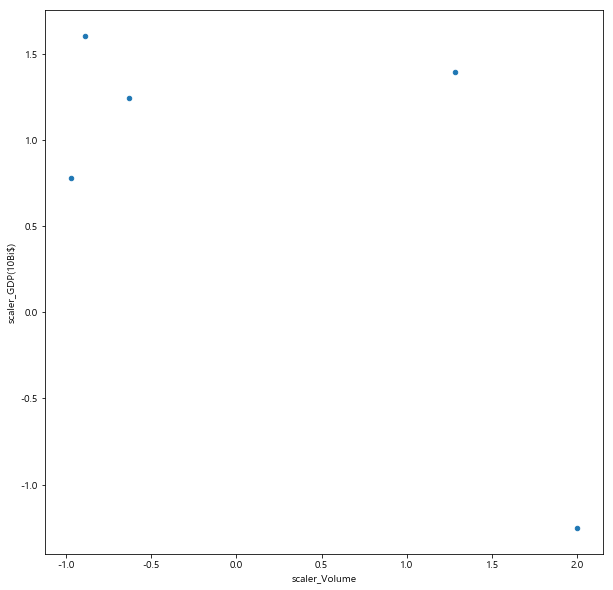

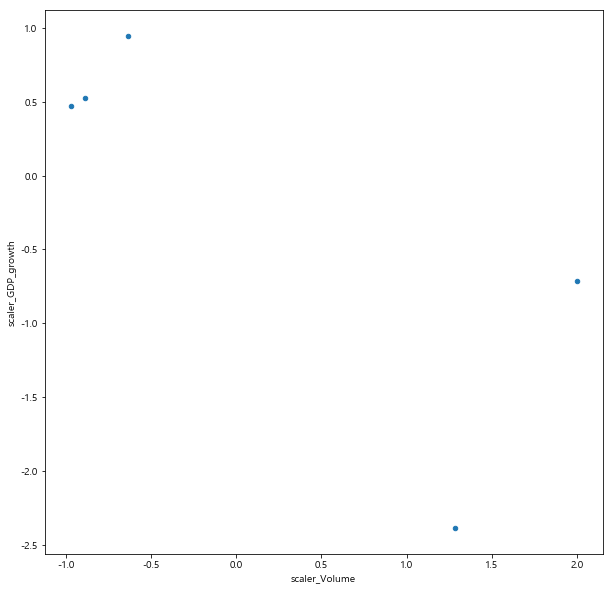

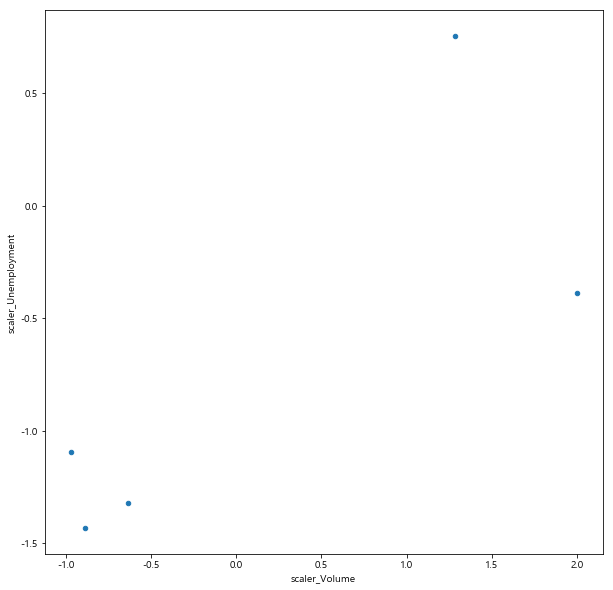

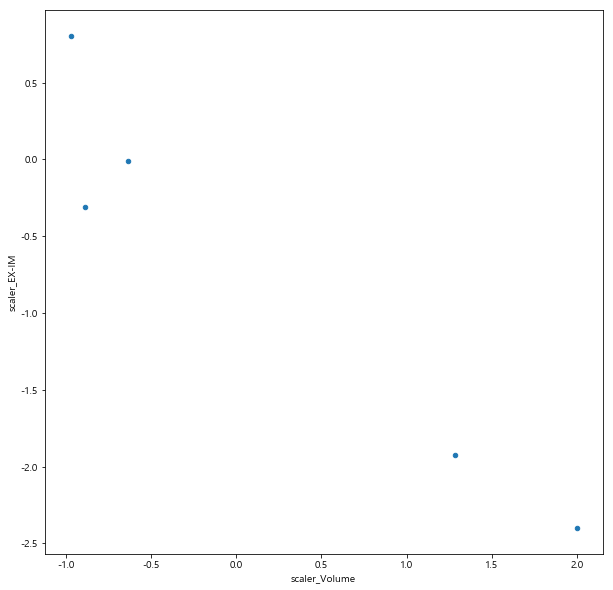

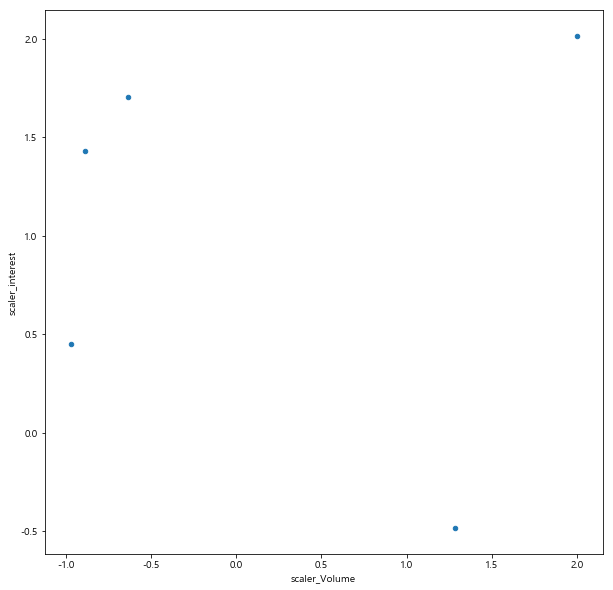

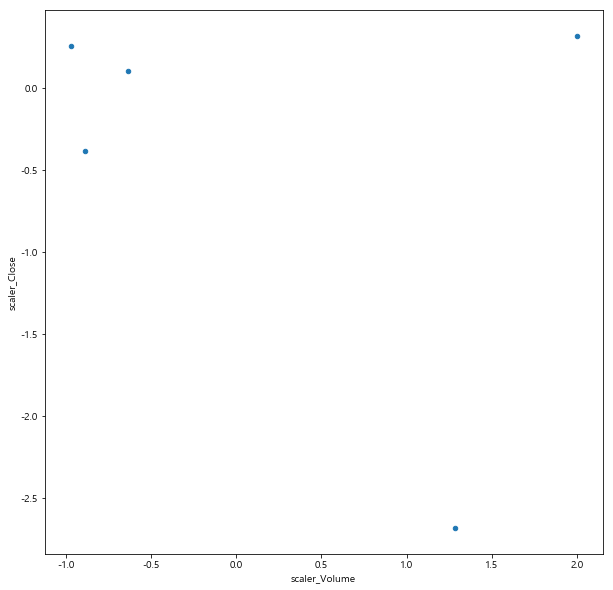

In [197]:
party_1 = scale_H7.loc[scale_H7['party']==1]
for i in corr:
    if i == 'scaler_Volume':
        pass
    else :
        coff_result = stats.pearsonr(party_1['scaler_Volume'],party_1[i])
        print('EOM의 Volume와',i,'의 상관관계')
        print(coff_result)
#         if coff_result[1]<0.0001:
        party_1[['scaler_Volume',i]].plot.scatter(x = 'scaler_Volume', y = i,colormap='viridis',figsize = (10,10))

EOM의 종가와 scaler_GDP(10Bi$) 의 상관관계
(0.6958471619722228, 0.05527216705033454)
EOM의 종가와 scaler_GDP_growth 의 상관관계
(0.3851341891066275, 0.346103746396554)
EOM의 종가와 scaler_Unemployment 의 상관관계
(-0.6754400863293349, 0.06601706185632145)
EOM의 종가와 scaler_EX-IM 의 상관관계
(0.5120984872639746, 0.19447749752109628)
EOM의 종가와 scaler_interest 의 상관관계
(-0.25167812911231463, 0.5476520474019373)
EOM의 종가와 scaler_Volume 의 상관관계
(-0.9101625244313102, 0.0016927063239029168)


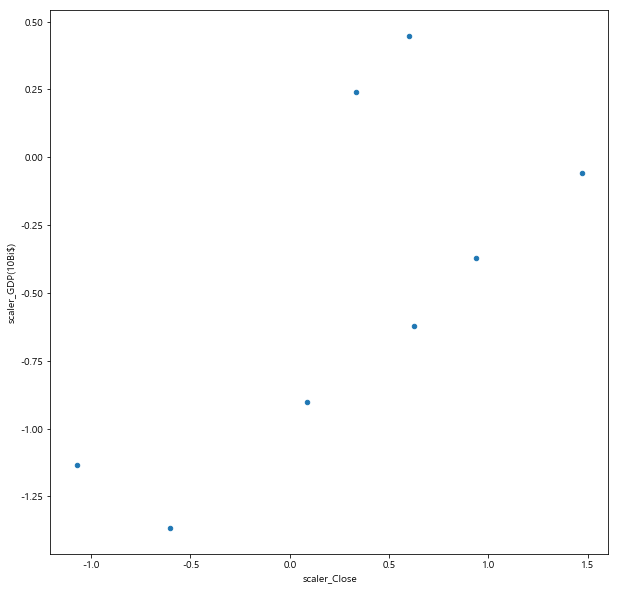

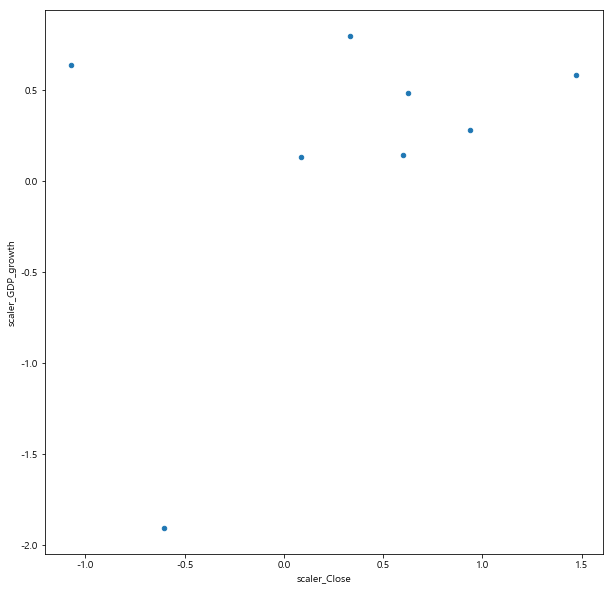

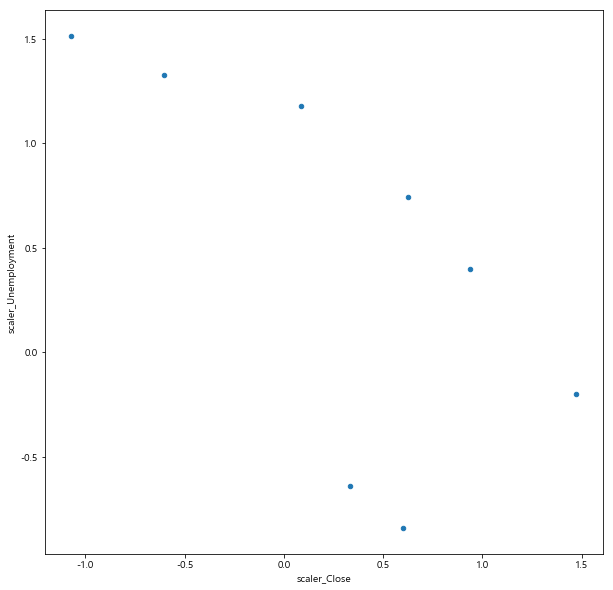

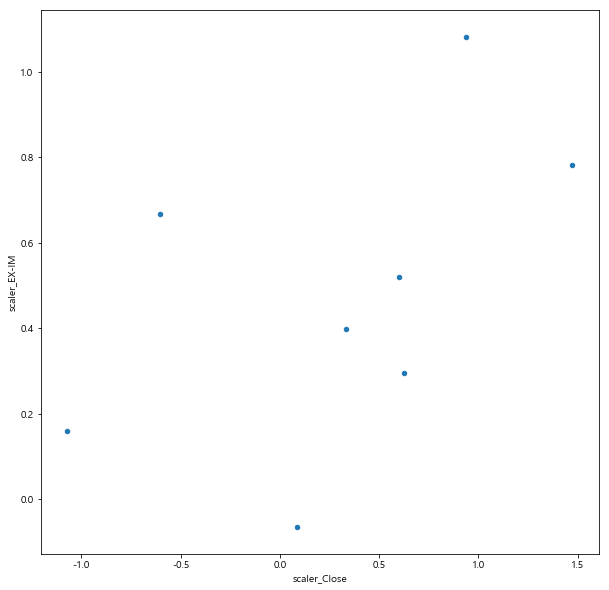

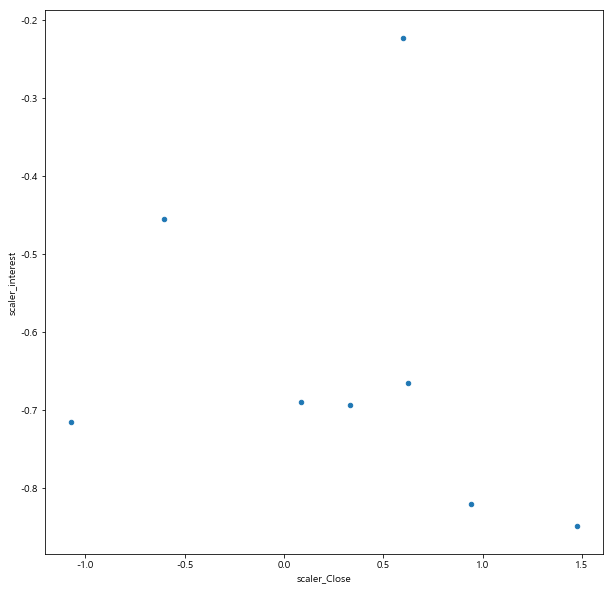

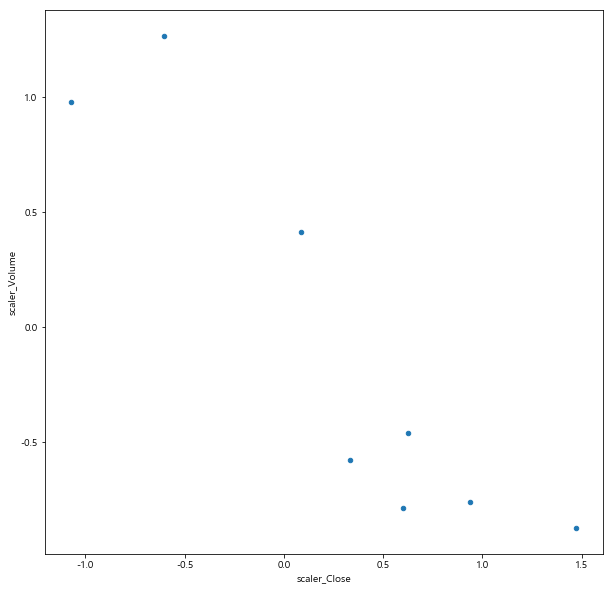

In [202]:
party_1 = scale_H7.loc[scale_H7['party']==0]
for i in corr:
    if i == 'scaler_Close':
        pass
    else :
        coff_result = stats.pearsonr(party_1['scaler_Close'],party_1[i])
        print('EOM의 종가와',i,'의 상관관계')
        print(coff_result)
#         if coff_result[1]<0.0001:
        party_1[['scaler_Close',i]].plot.scatter(x = 'scaler_Close', y = i,colormap='viridis',figsize = (10,10))

EOM의 Volume와 scaler_GDP(10Bi$) 의 상관관계
(-0.8830101493853695, 0.003659976740761991)
EOM의 Volume와 scaler_GDP_growth 의 상관관계
(-0.6051314759804971, 0.11193693029923253)
EOM의 Volume와 scaler_Unemployment 의 상관관계
(0.8341301127569368, 0.010036663129472443)
EOM의 Volume와 scaler_EX-IM 의 상관관계
(-0.4214644660491194, 0.2983492898372716)
EOM의 Volume와 scaler_interest 의 상관관계
(0.1407120898564978, 0.7396267502249498)
EOM의 Volume와 scaler_Close 의 상관관계
(-0.9101625244313102, 0.0016927063239029168)


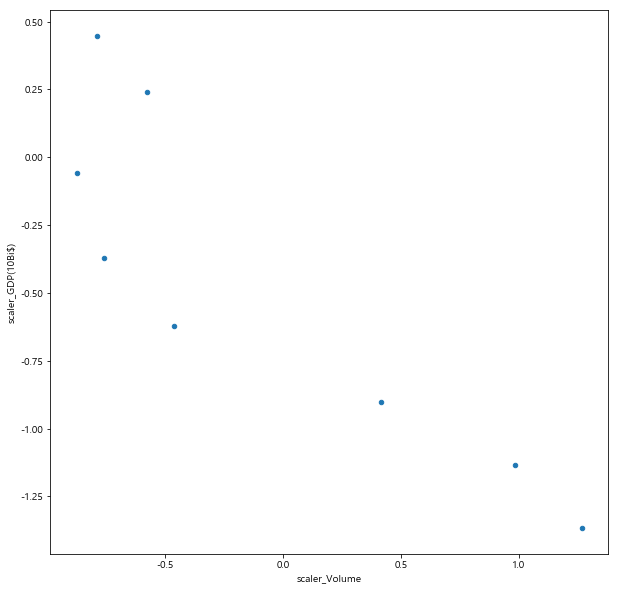

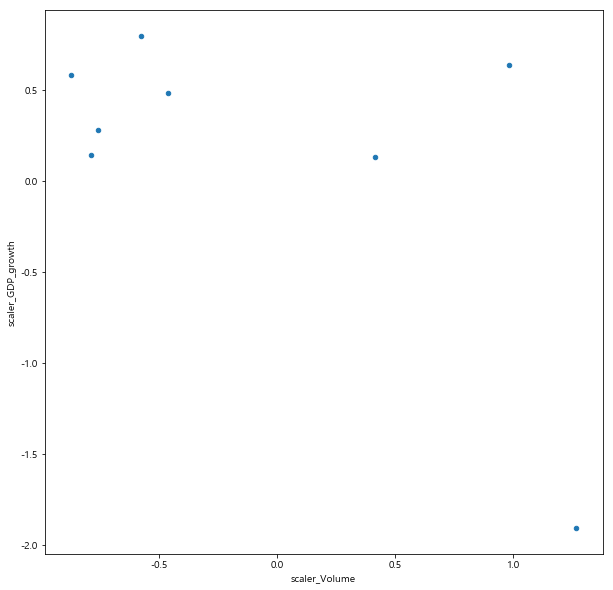

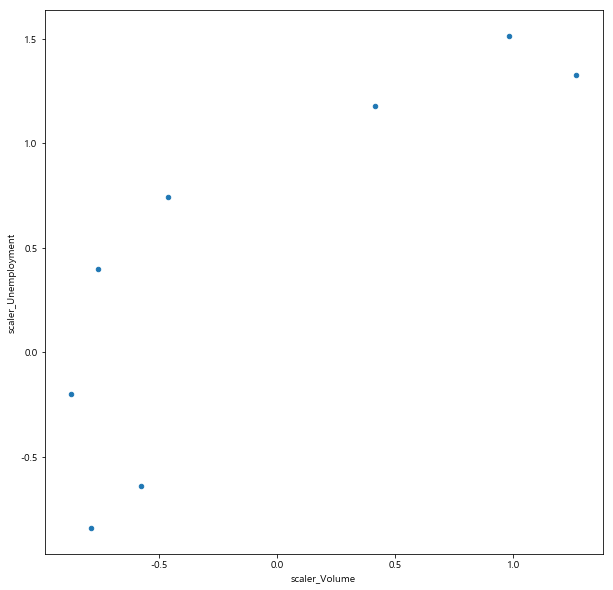

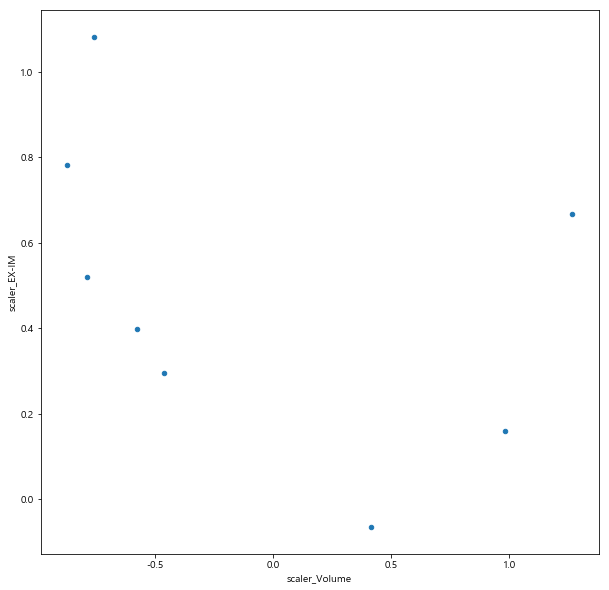

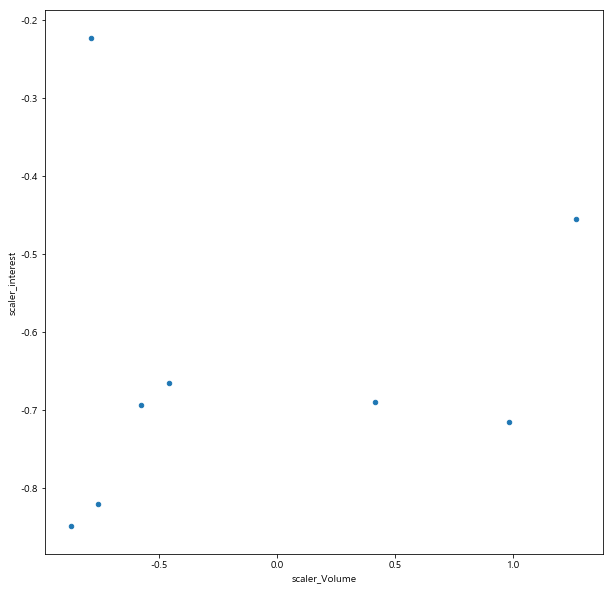

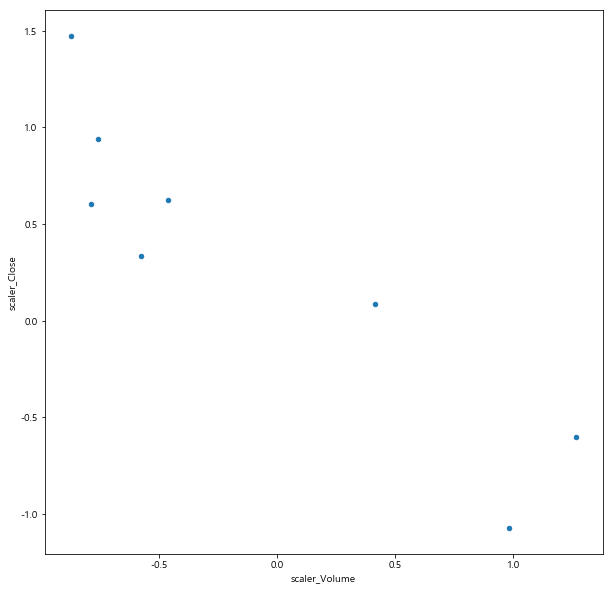

In [198]:
party_1 = scale_H7.loc[scale_H7['party']==0]
for i in corr:
    if i == 'scaler_Volume':
        pass
    else :
        coff_result = stats.pearsonr(party_1['scaler_Volume'],party_1[i])
        print('EOM의 Volume와',i,'의 상관관계')
        print(coff_result)
#         if coff_result[1]<0.0001:
        party_1[['scaler_Volume',i]].plot.scatter(x = 'scaler_Volume', y = i,colormap='viridis',figsize = (10,10))